# ClusterPC simulation

This notebook runs a small simulation. It evaluates and compares Cluster-PC with the baseline PC algorithm and visualizes the results. 

In [206]:
# Importing dependencies
%load_ext autoreload
%autoreload 2
import itertools
import yaml
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from clustercausal.experiments.ExperimentRunner import ExperimentRunner
from clustercausal.utils.Utils import *
from clustercausal.experiments.Utils import load_experiment_folder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The cell below executes a simulation according to the specified yaml file. To run several yaml files, it is recommended to modify the run_gridsearch.py file and run the simulation in the terminal with 

>```python clustercausal\experiments\run_gridsearch.py```

Depending on the number of experiments, the simulation can take a while. A simulation with 10 node graphs, 900 configurations total takes around 15 minutes on a standard laptop if the graphs aren't too dense (below 50 nodes). A sample yaml of all possible configurations can be found in ```clustercausal\experiments\configs\cluster_pc_all_param_configs.yaml```. It is not recommended to run that file, it is for reference only. 

To run the experiment, uncomment the code in the cell below. 

In [207]:
config_path = 'clustercausal\experiments\configs\cluster_pc_mass_simulation.yaml'
config_path = config_path.replace('\\', '/')
experiment = ExperimentRunner(config_path)
experiment.run_gridsearch_experiment()

2023-11-11 14:13:39,681 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Number of experiments: 1080
Duration of algorithm was 0.15sec


Mean of empty slice.
invalid value encountered in double_scalars
2023-11-11 14:13:40,176 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.16sec


2023-11-11 14:13:40,684 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.20sec


2023-11-11 14:13:41,289 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.20sec


2023-11-11 14:13:41,913 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.17sec


2023-11-11 14:13:42,439 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.15sec


2023-11-11 14:13:42,927 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.25sec


2023-11-11 14:13:43,689 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.26sec
Duration of algorithm was 0.13sec


2023-11-11 14:13:44,148 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.11sec


2023-11-11 14:13:44,572 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.24sec


2023-11-11 14:13:45,293 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.12sec


2023-11-11 14:13:45,663 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.20sec


2023-11-11 14:13:46,311 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.45sec


2023-11-11 14:13:47,690 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.44sec
Duration of algorithm was 0.50sec


2023-11-11 14:13:49,145 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.48sec


2023-11-11 14:13:50,567 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.08sec


2023-11-11 14:13:50,832 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.15sec


2023-11-11 14:13:51,332 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.14sec


2023-11-11 14:13:51,722 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.20sec


2023-11-11 14:13:52,248 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.09sec


2023-11-11 14:13:52,568 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.17sec


2023-11-11 14:13:53,122 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.14sec


2023-11-11 14:13:53,581 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.17sec


2023-11-11 14:13:54,118 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.14sec


2023-11-11 14:13:54,611 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.38sec


2023-11-11 14:13:55,735 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.34sec
Duration of algorithm was 0.30sec


2023-11-11 14:13:56,905 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.41sec
Duration of algorithm was 0.17sec


2023-11-11 14:13:57,487 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.38sec


2023-11-11 14:13:58,808 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.46sec
Duration of algorithm was 0.34sec


2023-11-11 14:13:59,938 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.36sec
Duration of algorithm was 0.41sec


2023-11-11 14:14:01,127 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.39sec
Duration of algorithm was 0.10sec


2023-11-11 14:14:01,428 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.09sec


2023-11-11 14:14:01,748 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.06sec


2023-11-11 14:14:02,053 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.13sec


2023-11-11 14:14:02,494 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.08sec


2023-11-11 14:14:02,765 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.15sec


2023-11-11 14:14:03,303 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.32sec


2023-11-11 14:14:04,340 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.35sec
Duration of algorithm was 0.09sec


2023-11-11 14:14:04,658 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.12sec


2023-11-11 14:14:05,076 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.23sec


2023-11-11 14:14:05,771 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.13sec


2023-11-11 14:14:06,422 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.11sec


2023-11-11 14:14:06,838 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.18sec


2023-11-11 14:14:08,096 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.51sec
Duration of algorithm was 0.44sec


2023-11-11 14:14:09,312 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.38sec
Duration of algorithm was 0.27sec


2023-11-11 14:14:10,758 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.57sec
Duration of algorithm was 0.06sec


2023-11-11 14:14:10,995 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.07sec
Duration of algorithm was 0.07sec


2023-11-11 14:14:11,285 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.08sec


2023-11-11 14:14:11,561 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.08sec


2023-11-11 14:14:11,881 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2023-11-11 14:14:12,243 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.08sec


2023-11-11 14:14:12,548 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.11sec


2023-11-11 14:14:12,961 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.27sec


2023-11-11 14:14:13,838 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.29sec
Duration of algorithm was 0.13sec


2023-11-11 14:14:14,325 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.13sec


2023-11-11 14:14:14,847 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.24sec


2023-11-11 14:14:15,695 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.28sec
Duration of algorithm was 0.15sec


2023-11-11 14:14:16,315 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.25sec


2023-11-11 14:14:17,378 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.39sec
Duration of algorithm was 0.40sec


2023-11-11 14:14:19,765 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.98sec
Duration of algorithm was 0.26sec


2023-11-11 14:14:20,897 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.39sec
Duration of algorithm was 0.11sec


2023-11-11 14:14:21,286 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.06sec


2023-11-11 14:14:21,571 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.06sec


2023-11-11 14:14:21,881 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.10sec


2023-11-11 14:14:22,297 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.12sec


2023-11-11 14:14:22,731 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.15sec


2023-11-11 14:14:23,267 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.20sec


2023-11-11 14:14:24,131 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.31sec
Duration of algorithm was 0.07sec


2023-11-11 14:14:24,428 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.15sec


2023-11-11 14:14:25,185 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.11sec


2023-11-11 14:14:25,701 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.20sec


2023-11-11 14:14:26,451 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.05sec


2023-11-11 14:14:26,964 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.30sec


2023-11-11 14:14:28,430 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.54sec
Duration of algorithm was 0.63sec


2023-11-11 14:14:30,680 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.22sec


2023-11-11 14:14:32,113 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.07sec


2023-11-11 14:14:32,365 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.08sec
Duration of algorithm was 0.09sec


2023-11-11 14:14:32,675 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.10sec
Duration of algorithm was 0.09sec


2023-11-11 14:14:33,131 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.13sec


2023-11-11 14:14:33,665 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.17sec


2023-11-11 14:14:34,364 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.13sec


2023-11-11 14:14:34,864 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.09sec


2023-11-11 14:14:35,239 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.21sec


2023-11-11 14:14:36,080 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.28sec
Duration of algorithm was 0.07sec


2023-11-11 14:14:36,393 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.37sec


2023-11-11 14:14:37,887 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.55sec
Duration of algorithm was 0.20sec


2023-11-11 14:14:38,765 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.16sec


2023-11-11 14:14:39,479 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.12sec


2023-11-11 14:14:40,302 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.34sec
Duration of algorithm was 0.26sec


2023-11-11 14:14:41,547 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.46sec
Duration of algorithm was 0.36sec


2023-11-11 14:14:43,307 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.71sec
Duration of algorithm was 0.11sec


2023-11-11 14:14:43,672 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.26sec


2023-11-11 14:14:44,417 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.16sec


2023-11-11 14:14:44,915 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.14sec


2023-11-11 14:14:45,339 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2023-11-11 14:14:45,840 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.44sec


2023-11-11 14:14:47,120 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.41sec
Duration of algorithm was 0.17sec


2023-11-11 14:14:47,641 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.90sec


2023-11-11 14:14:50,258 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.28sec


2023-11-11 14:14:50,944 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.24sec


2023-11-11 14:14:51,664 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.23sec
Duration of algorithm was 0.48sec


2023-11-11 14:14:53,106 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.46sec
Duration of algorithm was 0.33sec


2023-11-11 14:14:54,122 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.61sec


2023-11-11 14:14:55,980 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.61sec
Duration of algorithm was 0.49sec


2023-11-11 14:14:57,465 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.46sec
Duration of algorithm was 0.73sec


2023-11-11 14:14:59,681 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.72sec
Duration of algorithm was 0.23sec


2023-11-11 14:15:00,380 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.11sec


2023-11-11 14:15:00,685 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.09sec
Duration of algorithm was 0.24sec


2023-11-11 14:15:01,454 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.18sec


2023-11-11 14:15:01,955 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.35sec


2023-11-11 14:15:03,003 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.31sec


2023-11-11 14:15:03,958 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.31sec
Duration of algorithm was 0.16sec


2023-11-11 14:15:04,522 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.13sec


2023-11-11 14:15:04,973 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2023-11-11 14:15:05,461 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.22sec


2023-11-11 14:15:06,180 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.39sec


2023-11-11 14:15:07,345 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.36sec
Duration of algorithm was 0.43sec


2023-11-11 14:15:09,079 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 0.70sec


2023-11-11 14:15:11,153 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.41sec


2023-11-11 14:15:12,468 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.43sec
Duration of algorithm was 0.65sec


2023-11-11 14:15:14,819 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.83sec
Duration of algorithm was 0.12sec


2023-11-11 14:15:15,225 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.09sec


2023-11-11 14:15:15,548 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2023-11-11 14:15:15,965 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.13sec
Duration of algorithm was 0.13sec


2023-11-11 14:15:16,443 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.18sec


2023-11-11 14:15:17,612 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.14sec


2023-11-11 14:15:18,030 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.22sec


2023-11-11 14:15:18,720 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.22sec
Duration of algorithm was 0.15sec


2023-11-11 14:15:19,248 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.50sec


2023-11-11 14:15:20,610 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.41sec
Duration of algorithm was 0.30sec


2023-11-11 14:15:21,550 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.30sec
Duration of algorithm was 0.16sec


2023-11-11 14:15:22,134 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.86sec


2023-11-11 14:15:24,894 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 0.29sec


2023-11-11 14:15:26,254 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.54sec
Duration of algorithm was 0.26sec


2023-11-11 14:15:27,857 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.65sec
Duration of algorithm was 0.44sec


2023-11-11 14:15:29,344 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.49sec
Duration of algorithm was 0.12sec


2023-11-11 14:15:29,788 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.13sec


2023-11-11 14:15:30,270 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.48sec


2023-11-11 14:15:31,646 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.43sec
Duration of algorithm was 0.25sec


2023-11-11 14:15:32,198 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.15sec
Duration of algorithm was 0.11sec


2023-11-11 14:15:32,587 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.15sec


2023-11-11 14:15:33,089 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.10sec


2023-11-11 14:15:33,548 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.22sec


2023-11-11 14:15:34,637 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.42sec
Duration of algorithm was 0.11sec


2023-11-11 14:15:34,994 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.20sec


2023-11-11 14:15:35,867 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.20sec


2023-11-11 14:15:36,712 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.18sec


2023-11-11 14:15:37,521 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.30sec
Duration of algorithm was 0.52sec


2023-11-11 14:15:39,195 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.47sec


2023-11-11 14:15:40,873 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.26sec


2023-11-11 14:15:41,981 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.41sec
Duration of algorithm was 0.12sec


2023-11-11 14:15:42,481 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.10sec


2023-11-11 14:15:42,808 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.11sec
Duration of algorithm was 0.13sec


2023-11-11 14:15:43,348 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.13sec


2023-11-11 14:15:44,164 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.30sec
Duration of algorithm was 0.11sec


2023-11-11 14:15:44,705 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.14sec


2023-11-11 14:15:45,281 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.32sec


2023-11-11 14:15:46,450 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.40sec
Duration of algorithm was 0.11sec


2023-11-11 14:15:46,836 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.29sec


2023-11-11 14:15:47,855 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.36sec
Duration of algorithm was 0.18sec


2023-11-11 14:15:49,340 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.16sec


2023-11-11 14:15:49,872 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.30sec


2023-11-11 14:15:51,137 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.22sec


2023-11-11 14:15:52,263 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.44sec
Duration of algorithm was 0.61sec


2023-11-11 14:15:56,747 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.93sec
Duration of algorithm was 1.03sec


2023-11-11 14:16:00,367 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.30sec
Duration of algorithm was 0.10sec


2023-11-11 14:16:00,868 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.11sec


2023-11-11 14:16:01,255 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.12sec
Duration of algorithm was 0.15sec


2023-11-11 14:16:01,816 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.17sec
Duration of algorithm was 0.12sec


2023-11-11 14:16:04,593 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.33sec
Duration of algorithm was 0.09sec


2023-11-11 14:16:05,304 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.11sec


2023-11-11 14:16:05,831 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.19sec
Duration of algorithm was 0.16sec


2023-11-11 14:16:06,329 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.14sec
Duration of algorithm was 0.18sec


2023-11-11 14:16:07,085 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.29sec
Duration of algorithm was 0.16sec


2023-11-11 14:16:10,933 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.88sec
Duration of algorithm was 0.33sec


2023-11-11 14:16:12,001 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.34sec
Duration of algorithm was 0.23sec


2023-11-11 14:16:12,971 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.20sec


2023-11-11 14:16:14,054 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.42sec
Duration of algorithm was 0.42sec


2023-11-11 14:16:15,886 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.28sec


2023-11-11 14:16:17,536 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.66sec
Duration of algorithm was 0.20sec


2023-11-11 14:16:18,563 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.39sec
Duration of algorithm was 0.85sec


2023-11-11 14:16:21,160 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 0.74sec


2023-11-11 14:16:23,377 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.64sec


2023-11-11 14:16:25,335 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.80sec


2023-11-11 14:16:27,764 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.89sec


2023-11-11 14:16:30,483 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.92sec
Duration of algorithm was 0.78sec


2023-11-11 14:16:32,780 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 1.08sec


2023-11-11 14:16:36,058 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.10sec
Duration of algorithm was 1.02sec


2023-11-11 14:16:39,023 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 0.89sec


2023-11-11 14:16:41,678 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.84sec
Duration of algorithm was 1.01sec


2023-11-11 14:16:44,749 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.03sec
Duration of algorithm was 1.19sec


2023-11-11 14:16:48,303 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.15sec
Duration of algorithm was 1.35sec


2023-11-11 14:16:52,338 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.29sec
Duration of algorithm was 1.55sec


2023-11-11 14:16:56,839 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.43sec
Duration of algorithm was 1.88sec


2023-11-11 14:17:02,505 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.86sec
Duration of algorithm was 1.81sec


2023-11-11 14:17:08,047 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.87sec
Duration of algorithm was 0.73sec


2023-11-11 14:17:10,317 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.75sec
Duration of algorithm was 0.51sec


2023-11-11 14:17:12,213 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.59sec


2023-11-11 14:17:14,156 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.66sec
Duration of algorithm was 0.68sec


2023-11-11 14:17:16,429 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.79sec
Duration of algorithm was 0.74sec


2023-11-11 14:17:19,244 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.99sec
Duration of algorithm was 0.76sec


2023-11-11 14:17:21,672 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 0.81sec


2023-11-11 14:17:24,155 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 0.81sec


2023-11-11 14:17:26,966 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.00sec
Duration of algorithm was 0.87sec


2023-11-11 14:17:29,714 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.82sec


2023-11-11 14:17:32,638 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.03sec
Duration of algorithm was 0.98sec


2023-11-11 14:17:35,859 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 0.87sec


2023-11-11 14:17:38,497 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.84sec
Duration of algorithm was 1.54sec


2023-11-11 14:17:43,779 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.82sec
Duration of algorithm was 1.54sec


2023-11-11 14:17:49,235 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.92sec
Duration of algorithm was 1.35sec


2023-11-11 14:17:53,788 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.53sec
Duration of algorithm was 0.71sec


2023-11-11 14:17:56,103 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.72sec


2023-11-11 14:17:58,505 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.52sec


2023-11-11 14:18:00,498 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.73sec


2023-11-11 14:18:03,131 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.94sec
Duration of algorithm was 0.68sec


2023-11-11 14:18:05,628 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.90sec
Duration of algorithm was 0.89sec


2023-11-11 14:18:08,499 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.96sec
Duration of algorithm was 0.95sec


2023-11-11 14:18:11,781 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.13sec
Duration of algorithm was 0.70sec


2023-11-11 14:18:14,614 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.07sec
Duration of algorithm was 0.93sec


2023-11-11 14:18:17,587 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.00sec
Duration of algorithm was 0.93sec


2023-11-11 14:18:21,389 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.36sec
Duration of algorithm was 0.84sec


2023-11-11 14:18:24,714 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.21sec
Duration of algorithm was 1.12sec


2023-11-11 14:18:28,417 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.29sec
Duration of algorithm was 1.15sec


2023-11-11 14:18:32,988 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.69sec
Duration of algorithm was 1.25sec


2023-11-11 14:18:37,867 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.74sec
Duration of algorithm was 1.43sec


2023-11-11 14:18:43,471 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.06sec
Duration of algorithm was 0.51sec


2023-11-11 14:18:45,187 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.51sec


2023-11-11 14:18:46,821 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.55sec
Duration of algorithm was 0.52sec


2023-11-11 14:18:48,572 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 0.79sec


2023-11-11 14:18:51,071 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.83sec
Duration of algorithm was 0.69sec


2023-11-11 14:18:53,403 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.68sec


2023-11-11 14:18:55,556 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.69sec
Duration of algorithm was 0.79sec


2023-11-11 14:18:58,272 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.91sec
Duration of algorithm was 0.72sec


2023-11-11 14:19:00,979 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.96sec
Duration of algorithm was 0.93sec


2023-11-11 14:19:04,592 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.35sec
Duration of algorithm was 1.16sec


2023-11-11 14:19:08,934 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.53sec
Duration of algorithm was 0.80sec


2023-11-11 14:19:12,231 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.23sec
Duration of algorithm was 1.14sec


2023-11-11 14:19:15,686 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.19sec
Duration of algorithm was 1.06sec


2023-11-11 14:19:20,088 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.65sec
Duration of algorithm was 1.51sec


2023-11-11 14:19:25,433 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.84sec
Duration of algorithm was 1.10sec


2023-11-11 14:19:29,495 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.45sec
Duration of algorithm was 0.47sec


2023-11-11 14:19:31,264 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.45sec


2023-11-11 14:19:32,996 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.61sec
Duration of algorithm was 0.66sec


2023-11-11 14:19:35,297 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.63sec


2023-11-11 14:19:37,447 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.74sec
Duration of algorithm was 0.58sec


2023-11-11 14:19:39,544 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.72sec


2023-11-11 14:19:42,048 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 0.90sec


2023-11-11 14:19:45,746 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.35sec
Duration of algorithm was 0.66sec


2023-11-11 14:19:48,163 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.69sec


2023-11-11 14:19:50,790 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.93sec
Duration of algorithm was 0.88sec


2023-11-11 14:19:54,463 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.37sec
Duration of algorithm was 0.87sec


2023-11-11 14:19:57,572 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.81sec


2023-11-11 14:20:00,595 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 1.08sec


2023-11-11 14:20:05,424 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.90sec
Duration of algorithm was 1.21sec


2023-11-11 14:20:10,231 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.75sec
Duration of algorithm was 1.06sec


2023-11-11 14:20:14,425 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.50sec
Duration of algorithm was 0.56sec


2023-11-11 14:20:16,081 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.45sec


2023-11-11 14:20:18,174 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.51sec


2023-11-11 14:20:19,753 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.49sec
Duration of algorithm was 0.69sec


2023-11-11 14:20:21,889 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.72sec
Duration of algorithm was 0.83sec


2023-11-11 14:20:25,096 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.17sec
Duration of algorithm was 0.41sec


2023-11-11 14:20:27,173 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.46sec


2023-11-11 14:20:29,098 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.72sec
Duration of algorithm was 0.82sec


2023-11-11 14:20:32,338 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.18sec
Duration of algorithm was 0.63sec


2023-11-11 14:20:34,955 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.98sec
Duration of algorithm was 1.04sec


2023-11-11 14:20:38,947 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.41sec
Duration of algorithm was 0.87sec


2023-11-11 14:20:42,371 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.24sec
Duration of algorithm was 0.99sec


2023-11-11 14:20:45,948 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.27sec
Duration of algorithm was 1.00sec


2023-11-11 14:20:50,854 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.93sec
Duration of algorithm was 0.78sec


2023-11-11 14:20:55,419 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.84sec
Duration of algorithm was 1.10sec


2023-11-11 14:21:00,513 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.97sec
Duration of algorithm was 0.39sec


2023-11-11 14:21:01,690 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.36sec
Duration of algorithm was 0.36sec


2023-11-11 14:21:02,774 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.35sec
Duration of algorithm was 0.20sec


2023-11-11 14:21:03,420 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.20sec
Duration of algorithm was 0.68sec


2023-11-11 14:21:05,430 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.66sec
Duration of algorithm was 0.68sec


2023-11-11 14:21:07,563 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.72sec
Duration of algorithm was 0.33sec


2023-11-11 14:21:08,614 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.34sec
Duration of algorithm was 0.46sec


2023-11-11 14:21:09,996 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.46sec
Duration of algorithm was 0.49sec


2023-11-11 14:21:11,464 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.29sec


2023-11-11 14:21:12,339 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.92sec


2023-11-11 14:21:15,163 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.93sec
Duration of algorithm was 0.83sec


2023-11-11 14:21:17,715 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.72sec


2023-11-11 14:21:19,856 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.59sec


2023-11-11 14:21:21,789 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.65sec
Duration of algorithm was 1.30sec


2023-11-11 14:21:25,672 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.26sec
Duration of algorithm was 0.99sec


2023-11-11 14:21:28,606 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 0.22sec


2023-11-11 14:21:29,347 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.29sec


2023-11-11 14:21:30,572 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.44sec
Duration of algorithm was 0.30sec


2023-11-11 14:21:31,592 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.34sec
Duration of algorithm was 0.16sec


2023-11-11 14:21:32,071 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.16sec
Duration of algorithm was 0.16sec


2023-11-11 14:21:32,677 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.21sec
Duration of algorithm was 0.31sec


2023-11-11 14:21:33,786 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.36sec
Duration of algorithm was 0.67sec


2023-11-11 14:21:36,062 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.83sec
Duration of algorithm was 0.38sec


2023-11-11 14:21:37,397 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.44sec
Duration of algorithm was 0.55sec


2023-11-11 14:21:39,029 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.51sec
Duration of algorithm was 0.40sec


2023-11-11 14:21:40,338 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.43sec
Duration of algorithm was 0.52sec


2023-11-11 14:21:42,245 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.66sec
Duration of algorithm was 0.55sec


2023-11-11 14:21:44,100 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.63sec
Duration of algorithm was 0.68sec


2023-11-11 14:21:46,571 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.89sec


2023-11-11 14:21:49,455 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.99sec
Duration of algorithm was 1.41sec


2023-11-11 14:21:54,277 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.67sec
Duration of algorithm was 0.42sec


2023-11-11 14:21:55,842 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.47sec


2023-11-11 14:21:57,515 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.59sec
Duration of algorithm was 0.28sec


2023-11-11 14:21:58,497 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.33sec
Duration of algorithm was 0.27sec


2023-11-11 14:21:59,429 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.31sec
Duration of algorithm was 0.32sec


2023-11-11 14:22:00,561 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.38sec
Duration of algorithm was 0.32sec


2023-11-11 14:22:01,653 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.37sec
Duration of algorithm was 0.49sec


2023-11-11 14:22:03,062 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.43sec
Duration of algorithm was 0.46sec


2023-11-11 14:22:04,603 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.39sec


2023-11-11 14:22:06,031 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.49sec
Duration of algorithm was 0.63sec


2023-11-11 14:22:08,869 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 0.54sec


2023-11-11 14:22:10,997 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.75sec
Duration of algorithm was 0.72sec


2023-11-11 14:22:13,242 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.74sec
Duration of algorithm was 0.78sec


2023-11-11 14:22:15,681 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.88sec


2023-11-11 14:22:18,864 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.15sec
Duration of algorithm was 0.67sec


2023-11-11 14:22:21,353 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 0.36sec


2023-11-11 14:22:22,382 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.30sec
Duration of algorithm was 0.16sec


2023-11-11 14:22:23,116 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.26sec
Duration of algorithm was 0.27sec


2023-11-11 14:22:24,049 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.35sec


2023-11-11 14:22:25,353 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.21sec


2023-11-11 14:22:26,147 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.40sec


2023-11-11 14:22:27,532 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.46sec
Duration of algorithm was 0.18sec


2023-11-11 14:22:28,254 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.33sec


2023-11-11 14:22:29,417 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.40sec
Duration of algorithm was 0.61sec


2023-11-11 14:22:31,553 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.75sec
Duration of algorithm was 0.58sec


2023-11-11 14:22:33,781 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 0.57sec


2023-11-11 14:22:35,781 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.44sec


2023-11-11 14:22:37,365 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.55sec
Duration of algorithm was 0.44sec


2023-11-11 14:22:39,181 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.77sec


2023-11-11 14:22:41,748 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.41sec


2023-11-11 14:22:43,453 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.28sec


2023-11-11 14:22:44,380 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.31sec
Duration of algorithm was 0.20sec


2023-11-11 14:22:45,152 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.44sec


2023-11-11 14:22:46,530 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.46sec
Duration of algorithm was 0.32sec


2023-11-11 14:22:47,879 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.51sec
Duration of algorithm was 0.25sec


2023-11-11 14:22:48,671 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.27sec
Duration of algorithm was 0.41sec


2023-11-11 14:22:50,170 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.26sec


2023-11-11 14:22:51,101 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.31sec
Duration of algorithm was 0.24sec


2023-11-11 14:22:52,029 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.34sec


2023-11-11 14:22:53,297 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.20sec


2023-11-11 14:22:54,072 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.49sec


2023-11-11 14:22:55,770 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.57sec
Duration of algorithm was 0.39sec


2023-11-11 14:22:57,098 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.75sec


2023-11-11 14:23:00,052 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.09sec
Duration of algorithm was 0.31sec


2023-11-11 14:23:01,530 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.54sec


2023-11-11 14:23:03,281 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.27sec


2023-11-11 14:23:04,430 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.43sec
Duration of algorithm was 0.36sec


2023-11-11 14:23:05,705 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.26sec


2023-11-11 14:23:06,631 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.31sec
Duration of algorithm was 0.28sec


2023-11-11 14:23:07,706 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.35sec
Duration of algorithm was 0.19sec


2023-11-11 14:23:08,523 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.30sec
Duration of algorithm was 0.38sec


2023-11-11 14:23:09,930 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.50sec
Duration of algorithm was 0.51sec


2023-11-11 14:23:11,810 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.65sec
Duration of algorithm was 0.45sec


2023-11-11 14:23:13,526 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 0.44sec


2023-11-11 14:23:15,011 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.50sec
Duration of algorithm was 0.30sec


2023-11-11 14:23:16,304 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.49sec
Duration of algorithm was 0.34sec


2023-11-11 14:23:17,511 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.43sec
Duration of algorithm was 0.53sec


2023-11-11 14:23:19,589 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.77sec


2023-11-11 14:23:22,255 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.91sec
Duration of algorithm was 0.88sec


2023-11-11 14:23:25,565 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.18sec
Duration of algorithm was 0.42sec


2023-11-11 14:23:27,519 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.41sec


2023-11-11 14:23:28,797 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.41sec
Duration of algorithm was 0.41sec


2023-11-11 14:23:30,065 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.44sec
Duration of algorithm was 0.21sec


2023-11-11 14:23:30,676 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.18sec
Duration of algorithm was 0.58sec


2023-11-11 14:23:32,447 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.57sec


2023-11-11 14:23:34,203 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.61sec
Duration of algorithm was 0.28sec


2023-11-11 14:23:34,996 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.25sec
Duration of algorithm was 0.55sec


2023-11-11 14:23:36,681 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.54sec
Duration of algorithm was 0.57sec


2023-11-11 14:23:38,467 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.63sec


2023-11-11 14:23:40,369 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.61sec
Duration of algorithm was 0.65sec


2023-11-11 14:23:42,350 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.68sec


2023-11-11 14:23:44,389 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.65sec
Duration of algorithm was 0.74sec


2023-11-11 14:23:46,636 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.98sec


2023-11-11 14:23:49,615 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.96sec
Duration of algorithm was 0.77sec


2023-11-11 14:23:51,962 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 1.17sec


2023-11-11 14:23:55,503 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.15sec
Duration of algorithm was 0.42sec


2023-11-11 14:23:57,036 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.41sec


2023-11-11 14:23:58,272 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.40sec
Duration of algorithm was 0.33sec


2023-11-11 14:23:59,380 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.38sec
Duration of algorithm was 0.24sec


2023-11-11 14:24:00,208 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.28sec
Duration of algorithm was 0.32sec


2023-11-11 14:24:01,179 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.33sec


2023-11-11 14:24:02,305 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.38sec
Duration of algorithm was 0.59sec


2023-11-11 14:24:04,148 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 0.36sec


2023-11-11 14:24:05,487 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.39sec


invalid value encountered in double_scalars
invalid value encountered in double_scalars
2023-11-11 14:24:06,981 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.61sec


2023-11-11 14:24:09,488 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 0.72sec


2023-11-11 14:24:11,829 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.45sec


2023-11-11 14:24:13,514 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.68sec


2023-11-11 14:24:16,049 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.90sec
Duration of algorithm was 0.72sec


2023-11-11 14:24:18,389 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 1.28sec


2023-11-11 14:24:22,724 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.47sec
Duration of algorithm was 0.32sec


2023-11-11 14:24:23,910 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.42sec
Duration of algorithm was 0.22sec


2023-11-11 14:24:24,796 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.33sec
Duration of algorithm was 0.39sec


2023-11-11 14:24:26,153 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.36sec


2023-11-11 14:24:27,462 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.32sec


2023-11-11 14:24:28,514 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.34sec
Duration of algorithm was 0.47sec


2023-11-11 14:24:30,085 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.55sec
Duration of algorithm was 0.43sec


2023-11-11 14:24:31,568 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.52sec
Duration of algorithm was 0.30sec


2023-11-11 14:24:32,704 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.40sec
Duration of algorithm was 0.42sec


2023-11-11 14:24:34,054 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.44sec
Duration of algorithm was 0.68sec


2023-11-11 14:24:36,240 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.32sec


2023-11-11 14:24:37,614 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.49sec
Duration of algorithm was 0.30sec


2023-11-11 14:24:38,987 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.52sec
Duration of algorithm was 0.62sec


2023-11-11 14:24:41,387 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.56sec


2023-11-11 14:24:43,768 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.83sec


2023-11-11 14:24:46,650 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.01sec
Duration of algorithm was 0.38sec


2023-11-11 14:24:47,901 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.42sec
Duration of algorithm was 0.24sec


2023-11-11 14:24:48,806 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.31sec
Duration of algorithm was 0.35sec


2023-11-11 14:24:49,901 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.35sec
Duration of algorithm was 0.20sec


2023-11-11 14:24:50,621 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.24sec
Duration of algorithm was 0.42sec


2023-11-11 14:24:52,122 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.54sec
Duration of algorithm was 0.47sec


2023-11-11 14:24:53,510 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.44sec
Duration of algorithm was 0.35sec


2023-11-11 14:24:54,824 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.35sec


2023-11-11 14:24:55,971 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.39sec
Duration of algorithm was 0.29sec


2023-11-11 14:24:57,194 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.37sec


2023-11-11 14:24:58,505 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.34sec


2023-11-11 14:24:59,914 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.61sec


2023-11-11 14:25:02,029 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.76sec
Duration of algorithm was 0.67sec


2023-11-11 14:25:04,712 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.02sec
Duration of algorithm was 0.71sec


2023-11-11 14:25:07,581 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.67sec


2023-11-11 14:25:10,054 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.27sec


2023-11-11 14:25:11,272 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.46sec
Duration of algorithm was 0.31sec


2023-11-11 14:25:12,519 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.44sec
Duration of algorithm was 0.27sec


2023-11-11 14:25:13,720 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.46sec
Duration of algorithm was 0.28sec


2023-11-11 14:25:14,686 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.33sec
Duration of algorithm was 0.31sec


2023-11-11 14:25:15,921 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.44sec
Duration of algorithm was 0.27sec


2023-11-11 14:25:16,944 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.37sec
Duration of algorithm was 0.38sec


2023-11-11 14:25:18,825 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.39sec


2023-11-11 14:25:20,447 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.47sec


2023-11-11 14:25:22,437 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.76sec
Duration of algorithm was 0.39sec


2023-11-11 14:25:24,711 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.91sec
Duration of algorithm was 0.44sec


2023-11-11 14:25:26,416 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.41sec


2023-11-11 14:25:28,412 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.72sec


2023-11-11 14:25:31,777 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.32sec
Duration of algorithm was 0.53sec


2023-11-11 14:25:34,403 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.05sec
Duration of algorithm was 0.62sec


2023-11-11 14:25:37,284 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.11sec
Duration of algorithm was 0.28sec


2023-11-11 14:25:38,432 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.41sec
Duration of algorithm was 0.25sec


2023-11-11 14:25:39,549 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.41sec
Duration of algorithm was 0.24sec


2023-11-11 14:25:40,451 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.31sec


2023-11-11 14:25:41,901 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.54sec
Duration of algorithm was 0.28sec


2023-11-11 14:25:43,497 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.66sec
Duration of algorithm was 0.47sec


2023-11-11 14:25:45,139 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.25sec


2023-11-11 14:25:46,056 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.24sec


2023-11-11 14:25:46,971 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.33sec
Duration of algorithm was 0.36sec


2023-11-11 14:25:48,470 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.55sec
Duration of algorithm was 0.26sec


2023-11-11 14:25:49,731 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.49sec
Duration of algorithm was 0.39sec


2023-11-11 14:25:51,623 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.38sec


2023-11-11 14:25:53,178 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.52sec


2023-11-11 14:25:55,314 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.36sec


2023-11-11 14:25:57,385 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 0.45sec


2023-11-11 14:25:59,787 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.93sec
Duration of algorithm was 0.56sec


2023-11-11 14:26:01,503 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.55sec
Duration of algorithm was 0.66sec


2023-11-11 14:26:03,537 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.75sec


2023-11-11 14:26:05,723 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.86sec


2023-11-11 14:26:08,349 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 0.77sec


2023-11-11 14:26:10,697 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.83sec


2023-11-11 14:26:13,153 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 1.14sec


2023-11-11 14:26:16,500 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.07sec
Duration of algorithm was 0.91sec


2023-11-11 14:26:19,283 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.94sec
Duration of algorithm was 1.04sec


2023-11-11 14:26:22,501 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.11sec
Duration of algorithm was 1.26sec


2023-11-11 14:26:26,220 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.21sec
Duration of algorithm was 1.14sec


2023-11-11 14:26:29,727 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.20sec
Duration of algorithm was 1.35sec


2023-11-11 14:26:33,805 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.34sec
Duration of algorithm was 1.47sec


2023-11-11 14:26:38,287 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.45sec
Duration of algorithm was 1.69sec


2023-11-11 14:26:43,430 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.72sec
Duration of algorithm was 1.51sec


2023-11-11 14:26:48,107 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.51sec
Duration of algorithm was 0.63sec


2023-11-11 14:26:50,548 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.53sec


2023-11-11 14:26:52,451 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.65sec
Duration of algorithm was 0.43sec


2023-11-11 14:26:53,784 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.43sec
Duration of algorithm was 0.87sec


2023-11-11 14:26:56,536 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 0.92sec


2023-11-11 14:26:59,490 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.99sec
Duration of algorithm was 0.52sec


2023-11-11 14:27:01,454 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 1.00sec


2023-11-11 14:27:04,592 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.03sec
Duration of algorithm was 0.59sec


2023-11-11 14:27:06,911 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.88sec
Duration of algorithm was 0.73sec


2023-11-11 14:27:09,281 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.73sec


2023-11-11 14:27:11,986 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.96sec
Duration of algorithm was 1.35sec


2023-11-11 14:27:16,462 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.51sec
Duration of algorithm was 1.36sec


2023-11-11 14:27:20,869 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.50sec
Duration of algorithm was 1.38sec


2023-11-11 14:27:25,462 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.56sec
Duration of algorithm was 1.58sec


2023-11-11 14:27:30,355 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.60sec
Duration of algorithm was 1.35sec


2023-11-11 14:27:34,574 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.43sec
Duration of algorithm was 0.64sec


2023-11-11 14:27:36,964 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.57sec


2023-11-11 14:27:38,937 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.55sec


2023-11-11 14:27:40,931 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.72sec


2023-11-11 14:27:43,232 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.95sec


2023-11-11 14:27:46,909 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.31sec
Duration of algorithm was 0.60sec


2023-11-11 14:27:48,721 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.59sec
Duration of algorithm was 0.83sec


2023-11-11 14:27:51,664 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.05sec
Duration of algorithm was 0.53sec


2023-11-11 14:27:53,438 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.75sec


2023-11-11 14:27:56,003 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.90sec
Duration of algorithm was 0.76sec


2023-11-11 14:27:58,984 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.07sec
Duration of algorithm was 1.03sec


2023-11-11 14:28:02,769 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.30sec
Duration of algorithm was 1.14sec


2023-11-11 14:28:06,471 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.24sec
Duration of algorithm was 1.39sec


2023-11-11 14:28:11,272 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.67sec
Duration of algorithm was 1.48sec


2023-11-11 14:28:15,811 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.49sec
Duration of algorithm was 1.17sec


2023-11-11 14:28:20,136 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.52sec
Duration of algorithm was 0.58sec


2023-11-11 14:28:21,781 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.50sec
Duration of algorithm was 0.50sec


2023-11-11 14:28:23,578 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.32sec


2023-11-11 14:28:25,150 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.58sec


2023-11-11 14:28:27,737 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.02sec
Duration of algorithm was 0.63sec


2023-11-11 14:28:29,964 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.63sec


2023-11-11 14:28:32,345 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 0.63sec


2023-11-11 14:28:34,599 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.56sec


2023-11-11 14:28:36,779 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 0.72sec


2023-11-11 14:28:39,536 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.98sec
Duration of algorithm was 0.78sec


2023-11-11 14:28:42,887 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.25sec
Duration of algorithm was 0.76sec


2023-11-11 14:28:45,587 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.93sec
Duration of algorithm was 1.03sec


2023-11-11 14:28:49,563 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.40sec
Duration of algorithm was 1.32sec


2023-11-11 14:28:54,888 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.98sec
Duration of algorithm was 1.26sec


2023-11-11 14:28:59,347 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.53sec
Duration of algorithm was 1.70sec


2023-11-11 14:29:04,751 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.79sec
Duration of algorithm was 0.68sec


2023-11-11 14:29:06,230 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.38sec
Duration of algorithm was 0.53sec


2023-11-11 14:29:08,186 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.42sec


2023-11-11 14:29:10,148 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.57sec


2023-11-11 14:29:12,737 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.00sec
Duration of algorithm was 0.78sec


2023-11-11 14:29:15,653 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.07sec
Duration of algorithm was 0.71sec


2023-11-11 14:29:17,801 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.67sec


2023-11-11 14:29:20,402 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 0.61sec


2023-11-11 14:29:23,173 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.63sec


2023-11-11 14:29:25,805 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 1.01sec


2023-11-11 14:29:29,591 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.40sec
Duration of algorithm was 0.81sec


2023-11-11 14:29:32,842 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.22sec
Duration of algorithm was 0.94sec


2023-11-11 14:29:36,239 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.22sec
Duration of algorithm was 1.23sec


2023-11-11 14:29:40,575 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.48sec
Duration of algorithm was 1.70sec


2023-11-11 14:29:45,900 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.79sec
Duration of algorithm was 1.35sec


2023-11-11 14:29:51,454 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.13sec
Duration of algorithm was 0.54sec


2023-11-11 14:29:53,464 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.72sec
Duration of algorithm was 0.59sec


2023-11-11 14:29:55,692 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 0.55sec


2023-11-11 14:29:57,820 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.67sec


2023-11-11 14:30:00,295 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.92sec
Duration of algorithm was 0.46sec


2023-11-11 14:30:02,298 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.74sec
Duration of algorithm was 0.75sec


2023-11-11 14:30:04,681 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.62sec


2023-11-11 14:30:07,014 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.83sec
Duration of algorithm was 0.78sec


2023-11-11 14:30:10,190 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.18sec
Duration of algorithm was 0.67sec


2023-11-11 14:30:13,097 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.10sec
Duration of algorithm was 0.68sec


2023-11-11 14:30:16,314 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.25sec
Duration of algorithm was 0.87sec


2023-11-11 14:30:19,548 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.15sec
Duration of algorithm was 0.78sec


2023-11-11 14:30:22,772 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.23sec
Duration of algorithm was 0.98sec


2023-11-11 14:30:27,064 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.65sec
Duration of algorithm was 1.53sec


2023-11-11 14:30:32,814 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.08sec
Duration of algorithm was 1.07sec


2023-11-11 14:30:37,481 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.74sec
Duration of algorithm was 0.53sec


2023-11-11 14:30:39,064 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.50sec
Duration of algorithm was 0.57sec


2023-11-11 14:30:40,755 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.43sec


2023-11-11 14:30:42,064 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.42sec
Duration of algorithm was 0.70sec


2023-11-11 14:30:44,232 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.53sec


2023-11-11 14:30:45,870 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.84sec


2023-11-11 14:30:48,481 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.90sec
Duration of algorithm was 0.62sec


2023-11-11 14:30:50,348 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 0.55sec


2023-11-11 14:30:52,048 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.54sec
Duration of algorithm was 0.58sec


2023-11-11 14:30:53,798 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.95sec


2023-11-11 14:30:56,718 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.98sec
Duration of algorithm was 0.96sec


2023-11-11 14:30:59,714 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.02sec
Duration of algorithm was 0.98sec


2023-11-11 14:31:02,698 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.98sec
Duration of algorithm was 1.74sec


2023-11-11 14:31:08,048 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.77sec
Duration of algorithm was 1.58sec


2023-11-11 14:31:12,814 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.58sec
Duration of algorithm was 1.64sec


2023-11-11 14:31:17,797 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.63sec
Duration of algorithm was 0.52sec


2023-11-11 14:31:19,481 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.57sec
Duration of algorithm was 0.50sec


2023-11-11 14:31:21,298 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.53sec


2023-11-11 14:31:23,264 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.72sec
Duration of algorithm was 0.65sec


2023-11-11 14:31:25,664 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 0.78sec


2023-11-11 14:31:28,531 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.38sec


2023-11-11 14:31:29,914 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.48sec
Duration of algorithm was 0.57sec


2023-11-11 14:31:31,830 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.60sec


2023-11-11 14:31:33,797 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.58sec


2023-11-11 14:31:35,681 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.63sec
Duration of algorithm was 1.22sec


2023-11-11 14:31:39,748 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.37sec
Duration of algorithm was 0.78sec


2023-11-11 14:31:42,147 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.65sec


2023-11-11 14:31:44,453 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 1.13sec


2023-11-11 14:31:48,081 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.20sec
Duration of algorithm was 1.37sec


2023-11-11 14:31:52,531 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.50sec
Duration of algorithm was 1.55sec


2023-11-11 14:31:57,164 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.53sec
Duration of algorithm was 0.73sec


2023-11-11 14:31:59,548 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 0.62sec


2023-11-11 14:32:01,731 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.73sec


2023-11-11 14:32:04,154 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 0.77sec


2023-11-11 14:32:07,214 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 0.52sec


2023-11-11 14:32:09,164 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.54sec


2023-11-11 14:32:11,002 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.63sec
Duration of algorithm was 0.70sec


2023-11-11 14:32:13,597 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 0.63sec


2023-11-11 14:32:15,664 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.71sec
Duration of algorithm was 0.93sec


2023-11-11 14:32:18,547 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.96sec
Duration of algorithm was 0.78sec


2023-11-11 14:32:21,214 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.90sec
Duration of algorithm was 0.60sec


2023-11-11 14:32:23,614 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.92sec
Duration of algorithm was 0.85sec


2023-11-11 14:32:26,697 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.99sec


2023-11-11 14:32:30,398 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.32sec
Duration of algorithm was 1.00sec


2023-11-11 14:32:33,914 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.27sec
Duration of algorithm was 1.30sec


2023-11-11 14:32:38,747 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.76sec
Duration of algorithm was 0.48sec


2023-11-11 14:32:40,464 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 0.38sec


2023-11-11 14:32:41,797 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.44sec


2023-11-11 14:32:43,481 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 0.55sec


2023-11-11 14:32:45,781 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.93sec
Duration of algorithm was 0.57sec


2023-11-11 14:32:47,947 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.45sec


2023-11-11 14:32:49,464 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.52sec
Duration of algorithm was 0.83sec


2023-11-11 14:32:52,481 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.60sec


2023-11-11 14:32:54,647 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.75sec


2023-11-11 14:32:57,313 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.96sec
Duration of algorithm was 0.83sec


2023-11-11 14:33:00,381 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.10sec
Duration of algorithm was 0.73sec


2023-11-11 14:33:03,314 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.71sec


2023-11-11 14:33:05,714 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.88sec
Duration of algorithm was 1.03sec


2023-11-11 14:33:10,314 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.89sec
Duration of algorithm was 1.01sec


2023-11-11 14:33:14,631 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.68sec
Duration of algorithm was 0.98sec


2023-11-11 14:33:18,281 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.30sec
Duration of algorithm was 0.37sec


2023-11-11 14:33:19,814 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.55sec
Duration of algorithm was 0.37sec


2023-11-11 14:33:21,414 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 0.43sec


2023-11-11 14:33:23,031 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.57sec
Duration of algorithm was 0.50sec


2023-11-11 14:33:24,764 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.59sec
Duration of algorithm was 0.55sec


2023-11-11 14:33:27,064 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.93sec
Duration of algorithm was 0.50sec


2023-11-11 14:33:29,031 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.72sec
Duration of algorithm was 0.47sec


2023-11-11 14:33:30,788 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.61sec
Duration of algorithm was 0.85sec


2023-11-11 14:33:34,132 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.28sec
Duration of algorithm was 0.68sec


2023-11-11 14:33:36,514 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.83sec
Duration of algorithm was 0.52sec


2023-11-11 14:33:38,648 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.78sec


2023-11-11 14:33:41,414 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 0.95sec


2023-11-11 14:33:44,637 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.07sec
Duration of algorithm was 0.88sec


2023-11-11 14:33:48,598 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.53sec
Duration of algorithm was 0.83sec


2023-11-11 14:33:51,714 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 1.12sec


2023-11-11 14:33:56,347 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.72sec
Duration of algorithm was 0.38sec


2023-11-11 14:33:58,048 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.63sec
Duration of algorithm was 0.38sec


2023-11-11 14:33:59,364 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.43sec
Duration of algorithm was 0.90sec


2023-11-11 14:34:02,696 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.19sec
Duration of algorithm was 0.52sec


2023-11-11 14:34:04,948 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.88sec
Duration of algorithm was 0.43sec


2023-11-11 14:34:06,464 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.52sec


2023-11-11 14:34:08,497 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.55sec


2023-11-11 14:34:10,464 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.43sec


2023-11-11 14:34:12,214 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.68sec


2023-11-11 14:34:14,914 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.02sec
Duration of algorithm was 0.65sec


2023-11-11 14:34:17,398 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.75sec


2023-11-11 14:34:20,521 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.17sec
Duration of algorithm was 0.80sec


2023-11-11 14:34:23,914 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.28sec
Duration of algorithm was 0.78sec


2023-11-11 14:34:27,281 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.28sec
Duration of algorithm was 1.13sec


2023-11-11 14:34:31,921 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.78sec
Duration of algorithm was 0.81sec


2023-11-11 14:34:34,981 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 0.62sec


2023-11-11 14:34:36,840 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.45sec


2023-11-11 14:34:38,264 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.45sec
Duration of algorithm was 0.45sec


2023-11-11 14:34:39,681 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.60sec


2023-11-11 14:34:41,479 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.73sec


2023-11-11 14:34:43,754 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.68sec


2023-11-11 14:34:45,847 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.47sec


2023-11-11 14:34:47,288 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.97sec


2023-11-11 14:34:50,264 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.99sec
Duration of algorithm was 0.83sec


2023-11-11 14:34:52,846 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 0.95sec


2023-11-11 14:34:55,431 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.69sec


2023-11-11 14:34:57,731 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 1.00sec


2023-11-11 14:35:00,847 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.05sec
Duration of algorithm was 1.07sec


2023-11-11 14:35:04,114 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 1.28sec


2023-11-11 14:35:07,997 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.31sec
Duration of algorithm was 1.68sec


2023-11-11 14:35:13,155 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.65sec
Duration of algorithm was 0.28sec


2023-11-11 14:35:14,151 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.35sec
Duration of algorithm was 0.40sec


2023-11-11 14:35:15,641 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.44sec


2023-11-11 14:35:16,989 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.39sec
Duration of algorithm was 0.54sec


2023-11-11 14:35:18,837 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.63sec
Duration of algorithm was 0.49sec


2023-11-11 14:35:20,412 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.50sec


2023-11-11 14:35:22,057 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.49sec


2023-11-11 14:35:23,678 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.54sec
Duration of algorithm was 0.44sec


2023-11-11 14:35:25,105 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.48sec
Duration of algorithm was 0.65sec


2023-11-11 14:35:27,239 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.75sec
Duration of algorithm was 0.71sec


2023-11-11 14:35:30,335 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.18sec
Duration of algorithm was 0.67sec


2023-11-11 14:35:32,881 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.93sec
Duration of algorithm was 0.80sec


2023-11-11 14:35:35,374 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.83sec
Duration of algorithm was 0.95sec


2023-11-11 14:35:38,449 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 1.36sec


2023-11-11 14:35:42,530 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.32sec
Duration of algorithm was 1.35sec


2023-11-11 14:35:46,955 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.50sec
Duration of algorithm was 0.28sec


2023-11-11 14:35:48,054 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.39sec
Duration of algorithm was 0.41sec


2023-11-11 14:35:49,489 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.51sec
Duration of algorithm was 0.52sec


2023-11-11 14:35:51,120 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.36sec


2023-11-11 14:35:52,636 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.60sec


2023-11-11 14:35:54,820 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.49sec


2023-11-11 14:35:56,345 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.49sec
Duration of algorithm was 0.38sec


2023-11-11 14:35:57,672 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.38sec


2023-11-11 14:35:59,108 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.51sec
Duration of algorithm was 0.67sec


2023-11-11 14:36:01,419 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 1.11sec


2023-11-11 14:36:04,963 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.17sec
Duration of algorithm was 0.78sec


2023-11-11 14:36:07,586 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.90sec
Duration of algorithm was 0.58sec


2023-11-11 14:36:09,572 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.69sec
Duration of algorithm was 0.81sec


2023-11-11 14:36:12,716 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.19sec
Duration of algorithm was 1.03sec


2023-11-11 14:36:16,211 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.22sec
Duration of algorithm was 0.98sec


2023-11-11 14:36:19,501 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.14sec
Duration of algorithm was 0.36sec


2023-11-11 14:36:20,750 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.43sec
Duration of algorithm was 0.40sec


2023-11-11 14:36:22,126 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.32sec


2023-11-11 14:36:23,214 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.36sec
Duration of algorithm was 0.38sec


2023-11-11 14:36:24,463 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.42sec
Duration of algorithm was 0.39sec


2023-11-11 14:36:26,002 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.47sec


2023-11-11 14:36:27,716 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 0.50sec


2023-11-11 14:36:29,384 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.52sec


2023-11-11 14:36:31,420 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.74sec
Duration of algorithm was 0.55sec


2023-11-11 14:36:33,324 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.69sec


2023-11-11 14:36:36,146 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.04sec
Duration of algorithm was 0.97sec


2023-11-11 14:36:39,265 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.77sec


2023-11-11 14:36:42,212 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.10sec
Duration of algorithm was 0.85sec


2023-11-11 14:36:46,084 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.50sec
Duration of algorithm was 1.51sec


2023-11-11 14:36:50,805 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.56sec
Duration of algorithm was 0.99sec


2023-11-11 14:36:54,168 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.17sec
Duration of algorithm was 0.36sec


2023-11-11 14:36:55,839 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.38sec


2023-11-11 14:36:57,270 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.51sec
Duration of algorithm was 0.28sec


2023-11-11 14:36:58,256 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.32sec
Duration of algorithm was 0.40sec


2023-11-11 14:36:59,772 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.54sec
Duration of algorithm was 0.51sec


2023-11-11 14:37:01,472 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.35sec


2023-11-11 14:37:03,079 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.61sec
Duration of algorithm was 0.42sec


2023-11-11 14:37:04,455 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.47sec
Duration of algorithm was 0.49sec


2023-11-11 14:37:06,011 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.52sec
Duration of algorithm was 0.43sec


2023-11-11 14:37:07,555 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.55sec
Duration of algorithm was 0.61sec


2023-11-11 14:37:09,509 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.65sec
Duration of algorithm was 0.63sec


2023-11-11 14:37:11,990 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.94sec
Duration of algorithm was 0.55sec


2023-11-11 14:37:14,058 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.74sec
Duration of algorithm was 1.12sec


2023-11-11 14:37:18,123 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.45sec
Duration of algorithm was 0.99sec


2023-11-11 14:37:22,840 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.80sec
Duration of algorithm was 0.79sec


2023-11-11 14:37:26,033 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.20sec
Duration of algorithm was 0.41sec


2023-11-11 14:37:27,481 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.50sec
Duration of algorithm was 0.33sec


2023-11-11 14:37:28,906 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.35sec


2023-11-11 14:37:30,094 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.40sec
Duration of algorithm was 0.29sec


2023-11-11 14:37:31,224 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.40sec
Duration of algorithm was 0.47sec


2023-11-11 14:37:33,015 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.47sec


2023-11-11 14:37:34,585 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.56sec


2023-11-11 14:37:36,850 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.47sec


2023-11-11 14:37:39,195 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.92sec
Duration of algorithm was 0.64sec


2023-11-11 14:37:41,264 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.69sec
Duration of algorithm was 0.54sec


2023-11-11 14:37:43,567 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.45sec


2023-11-11 14:37:45,228 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.60sec


2023-11-11 14:37:47,328 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.52sec


2023-11-11 14:37:49,365 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.74sec
Duration of algorithm was 0.76sec


2023-11-11 14:37:52,284 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.66sec


2023-11-11 14:37:54,857 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.94sec
Duration of algorithm was 0.68sec


2023-11-11 14:37:56,896 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.77sec


2023-11-11 14:37:59,293 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 0.89sec


2023-11-11 14:38:01,858 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.91sec


2023-11-11 14:38:04,585 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.66sec


2023-11-11 14:38:06,605 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.66sec
Duration of algorithm was 0.88sec


2023-11-11 14:38:09,261 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 1.08sec


2023-11-11 14:38:12,477 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.09sec
Duration of algorithm was 1.14sec


2023-11-11 14:38:15,991 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.18sec
Duration of algorithm was 0.84sec


2023-11-11 14:38:18,579 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 1.49sec


2023-11-11 14:38:23,144 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.46sec
Duration of algorithm was 1.38sec


2023-11-11 14:38:27,278 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.36sec
Duration of algorithm was 1.18sec


2023-11-11 14:38:30,959 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.25sec
Duration of algorithm was 1.72sec


2023-11-11 14:38:36,150 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.69sec
Duration of algorithm was 1.65sec


2023-11-11 14:38:41,215 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.64sec
Duration of algorithm was 1.73sec


2023-11-11 14:38:46,396 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.69sec
Duration of algorithm was 0.72sec


2023-11-11 14:38:48,632 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.63sec


2023-11-11 14:38:50,934 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.84sec
Duration of algorithm was 0.66sec


2023-11-11 14:38:53,103 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.72sec


2023-11-11 14:38:55,442 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.79sec
Duration of algorithm was 0.71sec


2023-11-11 14:38:57,786 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.65sec


2023-11-11 14:38:59,948 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.75sec


2023-11-11 14:39:02,715 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.98sec
Duration of algorithm was 0.77sec


2023-11-11 14:39:05,565 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.73sec


2023-11-11 14:39:08,179 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.91sec
Duration of algorithm was 1.14sec


2023-11-11 14:39:11,842 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.28sec
Duration of algorithm was 1.19sec


2023-11-11 14:39:15,486 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.22sec
Duration of algorithm was 1.11sec


2023-11-11 14:39:19,042 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.23sec
Duration of algorithm was 1.42sec


2023-11-11 14:39:23,706 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.58sec
Duration of algorithm was 1.98sec


2023-11-11 14:39:29,657 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.95sec
Duration of algorithm was 2.01sec


2023-11-11 14:39:35,907 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.11sec
Duration of algorithm was 0.56sec


2023-11-11 14:39:37,890 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.67sec


2023-11-11 14:39:40,422 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 0.49sec


2023-11-11 14:39:42,164 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.59sec


2023-11-11 14:39:44,503 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.75sec


2023-11-11 14:39:46,904 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 0.84sec


2023-11-11 14:39:49,867 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.07sec
Duration of algorithm was 0.74sec


2023-11-11 14:39:52,549 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 0.79sec


2023-11-11 14:39:55,506 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.06sec
Duration of algorithm was 0.88sec


2023-11-11 14:39:59,044 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.34sec
Duration of algorithm was 0.75sec


2023-11-11 14:40:02,092 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.11sec
Duration of algorithm was 1.59sec


2023-11-11 14:40:07,589 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.91sec
Duration of algorithm was 0.92sec


2023-11-11 14:40:11,033 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.28sec
Duration of algorithm was 1.20sec


2023-11-11 14:40:15,213 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.40sec
Duration of algorithm was 1.52sec


2023-11-11 14:40:20,292 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.76sec
Duration of algorithm was 1.18sec


2023-11-11 14:40:24,713 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.56sec
Duration of algorithm was 0.51sec


2023-11-11 14:40:26,496 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.61sec
Duration of algorithm was 0.70sec


2023-11-11 14:40:28,953 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.50sec


2023-11-11 14:40:30,774 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.63sec
Duration of algorithm was 0.74sec


2023-11-11 14:40:33,375 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.91sec
Duration of algorithm was 0.51sec


2023-11-11 14:40:35,114 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.59sec
Duration of algorithm was 0.59sec


2023-11-11 14:40:37,326 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.79sec
Duration of algorithm was 0.43sec


2023-11-11 14:40:39,628 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 0.68sec


2023-11-11 14:40:41,949 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.79sec
Duration of algorithm was 0.53sec


2023-11-11 14:40:44,123 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 1.22sec


2023-11-11 14:40:48,210 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.39sec
Duration of algorithm was 0.89sec


2023-11-11 14:40:51,502 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.18sec
Duration of algorithm was 0.85sec


2023-11-11 14:40:54,574 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 1.49sec


2023-11-11 14:41:00,024 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.90sec
Duration of algorithm was 1.31sec


2023-11-11 14:41:04,273 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.45sec
Duration of algorithm was 1.30sec


2023-11-11 14:41:09,100 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.72sec
Duration of algorithm was 0.54sec


2023-11-11 14:41:10,805 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.53sec


2023-11-11 14:41:12,696 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.66sec
Duration of algorithm was 0.61sec


2023-11-11 14:41:15,175 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.94sec
Duration of algorithm was 0.55sec


2023-11-11 14:41:17,638 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.94sec
Duration of algorithm was 0.71sec


2023-11-11 14:41:19,949 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.60sec


2023-11-11 14:41:22,736 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.11sec
Duration of algorithm was 0.68sec


2023-11-11 14:41:25,017 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.67sec


2023-11-11 14:41:27,635 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 0.75sec


2023-11-11 14:41:30,479 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.05sec
Duration of algorithm was 0.89sec


2023-11-11 14:41:33,624 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.09sec
Duration of algorithm was 0.97sec


2023-11-11 14:41:37,506 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.40sec
Duration of algorithm was 0.71sec


2023-11-11 14:41:40,331 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.04sec
Duration of algorithm was 1.34sec


2023-11-11 14:41:44,766 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.51sec
Duration of algorithm was 1.13sec


2023-11-11 14:41:49,204 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.60sec
Duration of algorithm was 0.94sec


2023-11-11 14:41:53,565 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.70sec
Duration of algorithm was 0.54sec


2023-11-11 14:41:55,545 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.69sec
Duration of algorithm was 0.52sec


2023-11-11 14:41:57,386 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.59sec


2023-11-11 14:41:59,551 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 0.57sec


2023-11-11 14:42:01,626 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.74sec
Duration of algorithm was 0.54sec


2023-11-11 14:42:03,737 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.68sec


2023-11-11 14:42:05,983 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.79sec
Duration of algorithm was 0.79sec


2023-11-11 14:42:09,014 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.10sec
Duration of algorithm was 0.76sec


2023-11-11 14:42:11,941 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.07sec
Duration of algorithm was 0.62sec


2023-11-11 14:42:14,301 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.79sec


2023-11-11 14:42:17,439 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.14sec
Duration of algorithm was 0.75sec


2023-11-11 14:42:20,038 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.91sec
Duration of algorithm was 0.93sec


2023-11-11 14:42:24,781 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.87sec
Duration of algorithm was 1.13sec


2023-11-11 14:42:29,430 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.73sec
Duration of algorithm was 0.90sec


2023-11-11 14:42:34,004 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.82sec
Duration of algorithm was 1.54sec


2023-11-11 14:42:39,375 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.88sec
Duration of algorithm was 0.87sec


2023-11-11 14:42:42,049 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 0.66sec


2023-11-11 14:42:43,990 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.65sec


2023-11-11 14:42:45,845 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.82sec


2023-11-11 14:42:48,307 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.80sec
Duration of algorithm was 1.21sec


2023-11-11 14:42:52,080 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.27sec
Duration of algorithm was 1.34sec
Duration of algorithm was 1.30sec


2023-11-11 14:42:59,906 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.18sec


2023-11-11 14:43:03,532 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.17sec
Duration of algorithm was 1.41sec


2023-11-11 14:43:07,884 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.47sec
Duration of algorithm was 1.03sec


2023-11-11 14:43:10,994 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.01sec
Duration of algorithm was 1.26sec


2023-11-11 14:43:14,888 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.27sec
Duration of algorithm was 1.59sec


2023-11-11 14:43:19,800 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.59sec
Duration of algorithm was 1.02sec


2023-11-11 14:43:22,881 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.00sec
Duration of algorithm was 2.06sec


2023-11-11 14:43:29,197 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.09sec
Duration of algorithm was 1.91sec


2023-11-11 14:43:35,068 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.97sec
Duration of algorithm was 2.51sec


2023-11-11 14:43:42,476 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.41sec
Duration of algorithm was 0.67sec


2023-11-11 14:43:44,993 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.90sec
Duration of algorithm was 0.57sec


2023-11-11 14:43:47,048 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.74sec
Duration of algorithm was 0.59sec


2023-11-11 14:43:49,027 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.94sec


2023-11-11 14:43:52,178 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.06sec
Duration of algorithm was 0.82sec


2023-11-11 14:43:54,951 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.94sec
Duration of algorithm was 0.87sec


2023-11-11 14:43:57,774 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.98sec
Duration of algorithm was 1.01sec


2023-11-11 14:44:01,633 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.38sec
Duration of algorithm was 1.18sec


2023-11-11 14:44:05,453 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.25sec
Duration of algorithm was 1.02sec


2023-11-11 14:44:09,029 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.26sec
Duration of algorithm was 1.18sec


2023-11-11 14:44:12,949 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.32sec
Duration of algorithm was 1.28sec


2023-11-11 14:44:17,031 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.34sec
Duration of algorithm was 1.12sec


2023-11-11 14:44:21,016 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.36sec
Duration of algorithm was 1.52sec


2023-11-11 14:44:26,339 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.87sec
Duration of algorithm was 2.03sec


2023-11-11 14:44:32,502 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.03sec
Duration of algorithm was 2.03sec


2023-11-11 14:44:38,742 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.05sec
Duration of algorithm was 0.54sec


2023-11-11 14:44:40,663 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.52sec


2023-11-11 14:44:42,389 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.65sec


2023-11-11 14:44:44,863 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.87sec


2023-11-11 14:44:47,804 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.05sec
Duration of algorithm was 0.74sec


2023-11-11 14:44:50,639 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.02sec
Duration of algorithm was 0.67sec


2023-11-11 14:44:53,250 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.94sec
Duration of algorithm was 0.89sec


2023-11-11 14:44:56,716 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.29sec
Duration of algorithm was 1.13sec


2023-11-11 14:45:00,760 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.43sec
Duration of algorithm was 1.24sec


2023-11-11 14:45:04,626 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.25sec
Duration of algorithm was 1.10sec


2023-11-11 14:45:08,733 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.38sec
Duration of algorithm was 1.03sec


2023-11-11 14:45:12,373 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.30sec
Duration of algorithm was 1.21sec


2023-11-11 14:45:15,909 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.16sec
Duration of algorithm was 1.48sec


2023-11-11 14:45:21,155 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.82sec
Duration of algorithm was 1.90sec


2023-11-11 14:45:27,139 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.02sec
Duration of algorithm was 1.11sec


2023-11-11 14:45:31,395 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.54sec
Duration of algorithm was 0.50sec


2023-11-11 14:45:33,214 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.63sec
Duration of algorithm was 0.60sec


2023-11-11 14:45:35,493 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.81sec


2023-11-11 14:45:38,495 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.10sec
Duration of algorithm was 0.58sec


2023-11-11 14:45:40,729 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 0.78sec


2023-11-11 14:45:43,482 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 0.92sec


2023-11-11 14:45:46,655 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.11sec
Duration of algorithm was 0.73sec


2023-11-11 14:45:49,296 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.92sec
Duration of algorithm was 0.79sec


2023-11-11 14:45:51,791 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.84sec
Duration of algorithm was 0.57sec


2023-11-11 14:45:53,924 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.75sec
Duration of algorithm was 0.97sec


2023-11-11 14:45:57,540 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.31sec
Duration of algorithm was 1.44sec


2023-11-11 14:46:03,223 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.09sec
Duration of algorithm was 0.82sec


2023-11-11 14:46:06,211 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.04sec
Duration of algorithm was 1.75sec


2023-11-11 14:46:12,211 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.07sec
Duration of algorithm was 1.25sec


2023-11-11 14:46:17,247 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.84sec
Duration of algorithm was 1.19sec


2023-11-11 14:46:22,745 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.13sec
Duration of algorithm was 0.48sec


2023-11-11 14:46:24,778 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.72sec


2023-11-11 14:46:27,378 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 0.50sec


2023-11-11 14:46:29,213 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.65sec
Duration of algorithm was 0.88sec


2023-11-11 14:46:32,379 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 0.78sec


2023-11-11 14:46:35,611 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.22sec
Duration of algorithm was 0.73sec


2023-11-11 14:46:38,312 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 0.72sec


2023-11-11 14:46:41,178 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.62sec


2023-11-11 14:46:43,287 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.94sec


2023-11-11 14:46:46,662 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.20sec
Duration of algorithm was 1.18sec


2023-11-11 14:46:51,196 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.60sec
Duration of algorithm was 0.90sec


2023-11-11 14:46:55,128 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.45sec
Duration of algorithm was 1.20sec


2023-11-11 14:46:59,561 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.56sec
Duration of algorithm was 1.63sec


2023-11-11 14:47:05,562 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.16sec
Duration of algorithm was 1.58sec


2023-11-11 14:47:11,195 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.00sec
Duration of algorithm was 1.23sec


2023-11-11 14:47:15,479 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.52sec
Duration of algorithm was 0.52sec


2023-11-11 14:47:17,528 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.59sec


2023-11-11 14:47:19,724 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.62sec


2023-11-11 14:47:22,062 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.67sec


2023-11-11 14:47:24,719 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.93sec
Duration of algorithm was 0.71sec


2023-11-11 14:47:27,795 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.17sec
Duration of algorithm was 0.55sec


2023-11-11 14:47:30,178 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.92sec
Duration of algorithm was 0.82sec


2023-11-11 14:47:33,270 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.10sec
Duration of algorithm was 0.70sec


2023-11-11 14:47:36,662 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.35sec
Duration of algorithm was 0.78sec


2023-11-11 14:47:39,812 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.15sec
Duration of algorithm was 0.75sec


2023-11-11 14:47:43,028 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.18sec
Duration of algorithm was 1.17sec


2023-11-11 14:47:47,429 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.57sec
Duration of algorithm was 0.98sec


2023-11-11 14:47:51,245 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.43sec
Duration of algorithm was 1.45sec


2023-11-11 14:47:57,302 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.25sec
Duration of algorithm was 1.09sec


2023-11-11 14:48:02,308 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.88sec
Duration of algorithm was 1.21sec


2023-11-11 14:48:06,995 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.68sec
Duration of algorithm was 0.76sec


2023-11-11 14:48:09,262 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.50sec


2023-11-11 14:48:10,762 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.49sec
Duration of algorithm was 0.64sec


2023-11-11 14:48:12,662 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.60sec
Duration of algorithm was 1.07sec


2023-11-11 14:48:15,719 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 0.86sec


2023-11-11 14:48:18,402 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.93sec
Duration of algorithm was 1.13sec


2023-11-11 14:48:21,795 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 0.83sec


2023-11-11 14:48:24,312 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 1.00sec


2023-11-11 14:48:27,378 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.00sec
Duration of algorithm was 1.08sec


2023-11-11 14:48:30,678 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.06sec
Duration of algorithm was 1.13sec


2023-11-11 14:48:34,145 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.16sec
Duration of algorithm was 1.10sec


2023-11-11 14:48:37,445 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 1.15sec


2023-11-11 14:48:40,807 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 1.48sec


2023-11-11 14:48:45,312 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.48sec
Duration of algorithm was 1.45sec


2023-11-11 14:48:49,645 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.35sec
Duration of algorithm was 1.62sec


2023-11-11 14:48:54,584 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.63sec
Duration of algorithm was 0.59sec


2023-11-11 14:48:56,662 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.53sec


2023-11-11 14:48:58,462 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.57sec


2023-11-11 14:49:00,428 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 1.07sec


2023-11-11 14:49:04,395 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.40sec
Duration of algorithm was 0.72sec


2023-11-11 14:49:06,561 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.69sec
Duration of algorithm was 0.63sec


2023-11-11 14:49:08,728 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.92sec


2023-11-11 14:49:11,662 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.00sec
Duration of algorithm was 0.65sec


2023-11-11 14:49:13,862 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.73sec
Duration of algorithm was 0.90sec


2023-11-11 14:49:16,702 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 0.99sec


2023-11-11 14:49:19,736 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.98sec
Duration of algorithm was 1.08sec


2023-11-11 14:49:23,112 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.08sec
Duration of algorithm was 0.90sec


2023-11-11 14:49:25,827 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 1.56sec


2023-11-11 14:49:31,352 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.89sec
Duration of algorithm was 1.13sec


2023-11-11 14:49:35,412 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.43sec
Duration of algorithm was 1.42sec


2023-11-11 14:49:40,212 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.66sec
Duration of algorithm was 0.53sec


2023-11-11 14:49:42,195 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.67sec


2023-11-11 14:49:44,295 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.65sec


2023-11-11 14:49:46,394 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.71sec
Duration of algorithm was 0.58sec


2023-11-11 14:49:48,362 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.65sec
Duration of algorithm was 0.62sec


2023-11-11 14:49:50,728 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 0.59sec


2023-11-11 14:49:52,485 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.57sec
Duration of algorithm was 0.93sec


2023-11-11 14:49:55,745 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.14sec
Duration of algorithm was 0.83sec


2023-11-11 14:49:58,579 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.98sec
Duration of algorithm was 0.69sec


2023-11-11 14:50:01,045 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.88sec
Duration of algorithm was 1.00sec


2023-11-11 14:50:04,361 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.17sec
Duration of algorithm was 1.03sec


2023-11-11 14:50:07,645 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.13sec
Duration of algorithm was 1.50sec


2023-11-11 14:50:12,762 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.73sec
Duration of algorithm was 1.16sec


2023-11-11 14:50:16,795 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.36sec
Duration of algorithm was 1.43sec


2023-11-11 14:50:21,895 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.78sec
Duration of algorithm was 1.52sec


2023-11-11 14:50:26,834 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.73sec
Duration of algorithm was 0.57sec


2023-11-11 14:50:29,012 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.41sec


2023-11-11 14:50:30,544 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.54sec
Duration of algorithm was 0.48sec


2023-11-11 14:50:32,427 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.66sec
Duration of algorithm was 0.56sec


2023-11-11 14:50:34,190 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.63sec


2023-11-11 14:50:36,623 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.88sec
Duration of algorithm was 0.66sec


2023-11-11 14:50:39,158 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.96sec
Duration of algorithm was 0.54sec


2023-11-11 14:50:41,461 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 0.74sec


2023-11-11 14:50:44,276 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.05sec
Duration of algorithm was 0.57sec


2023-11-11 14:50:46,321 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.72sec
Duration of algorithm was 0.67sec


2023-11-11 14:50:49,007 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.01sec
Duration of algorithm was 0.75sec


2023-11-11 14:50:51,599 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.88sec
Duration of algorithm was 0.94sec


2023-11-11 14:50:54,983 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.22sec
Duration of algorithm was 1.19sec


2023-11-11 14:50:58,710 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.26sec
Duration of algorithm was 1.30sec


2023-11-11 14:51:02,948 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.38sec
Duration of algorithm was 1.13sec


2023-11-11 14:51:07,540 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.69sec
Duration of algorithm was 0.48sec


2023-11-11 14:51:09,339 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.63sec
Duration of algorithm was 0.44sec


2023-11-11 14:51:10,893 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.48sec


2023-11-11 14:51:12,801 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.69sec
Duration of algorithm was 0.59sec


2023-11-11 14:51:15,008 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.76sec
Duration of algorithm was 0.60sec


2023-11-11 14:51:17,160 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.76sec
Duration of algorithm was 0.58sec


2023-11-11 14:51:19,327 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.77sec


2023-11-11 14:51:22,186 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.01sec
Duration of algorithm was 0.78sec


2023-11-11 14:51:24,827 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.89sec
Duration of algorithm was 0.59sec


2023-11-11 14:51:26,736 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.64sec
Duration of algorithm was 0.85sec


2023-11-11 14:51:29,702 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.02sec
Duration of algorithm was 0.83sec


2023-11-11 14:51:33,044 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.23sec
Duration of algorithm was 0.77sec


2023-11-11 14:51:35,992 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.10sec
Duration of algorithm was 1.15sec


2023-11-11 14:51:40,216 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.50sec
Duration of algorithm was 1.20sec


2023-11-11 14:51:45,054 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.75sec
Duration of algorithm was 0.87sec


2023-11-11 14:51:49,014 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.51sec
Duration of algorithm was 0.40sec


2023-11-11 14:51:50,427 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.48sec
Duration of algorithm was 0.48sec


2023-11-11 14:51:52,310 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.66sec
Duration of algorithm was 0.59sec


2023-11-11 14:51:54,100 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.61sec


2023-11-11 14:51:56,770 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.99sec
Duration of algorithm was 0.62sec


2023-11-11 14:51:58,858 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.54sec


2023-11-11 14:52:00,493 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.52sec
Duration of algorithm was 0.65sec


2023-11-11 14:52:03,293 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.06sec
Duration of algorithm was 0.53sec


2023-11-11 14:52:05,500 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.86sec
Duration of algorithm was 0.63sec


2023-11-11 14:52:07,875 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 0.52sec


2023-11-11 14:52:10,642 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.13sec
Duration of algorithm was 0.80sec


2023-11-11 14:52:13,897 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.19sec
Duration of algorithm was 0.72sec


2023-11-11 14:52:16,793 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.09sec
Duration of algorithm was 1.07sec


2023-11-11 14:52:21,003 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.53sec
Duration of algorithm was 0.74sec


2023-11-11 14:52:24,774 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.45sec
Duration of algorithm was 1.05sec


2023-11-11 14:52:28,852 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.42sec
Duration of algorithm was 0.98sec


2023-11-11 14:52:31,794 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 0.77sec


2023-11-11 14:52:34,133 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.75sec
Duration of algorithm was 0.65sec


2023-11-11 14:52:35,904 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.53sec
Duration of algorithm was 0.83sec


2023-11-11 14:52:38,335 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.77sec
Duration of algorithm was 0.74sec


2023-11-11 14:52:40,606 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.76sec
Duration of algorithm was 0.81sec


2023-11-11 14:52:42,919 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.74sec
Duration of algorithm was 0.85sec


2023-11-11 14:52:45,479 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 1.18sec


2023-11-11 14:52:49,018 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.18sec
Duration of algorithm was 0.95sec


2023-11-11 14:52:51,893 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.95sec
Duration of algorithm was 1.54sec


2023-11-11 14:52:56,471 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.43sec
Duration of algorithm was 1.10sec


2023-11-11 14:52:59,766 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.07sec
Duration of algorithm was 1.49sec


2023-11-11 14:53:04,286 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.44sec
Duration of algorithm was 1.76sec


2023-11-11 14:53:09,511 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.72sec
Duration of algorithm was 1.86sec


2023-11-11 14:53:14,992 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.77sec
Duration of algorithm was 1.80sec


2023-11-11 14:53:20,611 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.88sec
Duration of algorithm was 0.60sec


2023-11-11 14:53:22,600 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.60sec


2023-11-11 14:53:24,854 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.83sec
Duration of algorithm was 0.51sec


2023-11-11 14:53:26,639 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.61sec
Duration of algorithm was 0.72sec


2023-11-11 14:53:29,002 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.81sec
Duration of algorithm was 0.69sec


2023-11-11 14:53:31,151 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.69sec
Duration of algorithm was 0.71sec


2023-11-11 14:53:33,710 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.94sec
Duration of algorithm was 1.01sec


2023-11-11 14:53:37,169 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.23sec
Duration of algorithm was 0.93sec


2023-11-11 14:53:40,385 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 0.78sec


2023-11-11 14:53:43,028 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.92sec
Duration of algorithm was 1.10sec


2023-11-11 14:53:46,446 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.14sec
Duration of algorithm was 1.10sec


2023-11-11 14:53:50,118 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.29sec
Duration of algorithm was 0.88sec


2023-11-11 14:53:52,841 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.90sec
Duration of algorithm was 1.81sec


2023-11-11 14:53:58,700 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.99sec
Duration of algorithm was 1.75sec


2023-11-11 14:54:04,275 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.82sec
Duration of algorithm was 1.28sec


2023-11-11 14:54:08,611 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.48sec
Duration of algorithm was 0.48sec


2023-11-11 14:54:10,502 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.67sec
Duration of algorithm was 0.71sec


2023-11-11 14:54:12,944 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.84sec
Duration of algorithm was 0.58sec


2023-11-11 14:54:14,794 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.59sec
Duration of algorithm was 0.80sec


2023-11-11 14:54:17,377 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.87sec
Duration of algorithm was 0.64sec


2023-11-11 14:54:19,617 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.75sec
Duration of algorithm was 0.86sec


2023-11-11 14:54:22,551 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.02sec
Duration of algorithm was 0.72sec


2023-11-11 14:54:24,897 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.78sec
Duration of algorithm was 0.67sec


2023-11-11 14:54:26,850 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.62sec
Duration of algorithm was 0.77sec


2023-11-11 14:54:29,599 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 1.02sec


2023-11-11 14:54:32,882 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.12sec
Duration of algorithm was 1.14sec


2023-11-11 14:54:36,425 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.16sec
Duration of algorithm was 0.86sec


2023-11-11 14:54:39,651 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.15sec
Duration of algorithm was 1.62sec


2023-11-11 14:54:44,773 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.64sec
Duration of algorithm was 1.67sec


2023-11-11 14:54:49,990 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.72sec
Duration of algorithm was 1.59sec


2023-11-11 14:54:55,181 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.73sec
Duration of algorithm was 0.49sec


2023-11-11 14:54:57,093 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.57sec


2023-11-11 14:54:59,086 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.69sec
Duration of algorithm was 0.58sec


2023-11-11 14:55:01,094 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.63sec


2023-11-11 14:55:03,611 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.90sec
Duration of algorithm was 0.76sec


2023-11-11 14:55:05,968 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.75sec
Duration of algorithm was 0.67sec


2023-11-11 14:55:08,217 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.76sec
Duration of algorithm was 0.82sec


2023-11-11 14:55:10,927 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.92sec
Duration of algorithm was 0.61sec


2023-11-11 14:55:13,337 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.88sec
Duration of algorithm was 0.95sec


2023-11-11 14:55:16,509 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.09sec
Duration of algorithm was 0.99sec


2023-11-11 14:55:19,533 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.99sec
Duration of algorithm was 0.91sec


2023-11-11 14:55:23,200 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.36sec
Duration of algorithm was 1.23sec


2023-11-11 14:55:27,236 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.35sec
Duration of algorithm was 1.51sec


2023-11-11 14:55:33,484 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 2.30sec
Duration of algorithm was 0.84sec


2023-11-11 14:55:36,735 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.20sec
Duration of algorithm was 1.63sec


2023-11-11 14:55:42,274 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.92sec
Duration of algorithm was 0.42sec


2023-11-11 14:55:43,861 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.56sec
Duration of algorithm was 0.59sec


2023-11-11 14:55:45,894 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.68sec
Duration of algorithm was 0.59sec


2023-11-11 14:55:47,999 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.76sec
Duration of algorithm was 0.77sec


2023-11-11 14:55:50,814 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.02sec
Duration of algorithm was 0.58sec


2023-11-11 14:55:52,836 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.66sec


2023-11-11 14:55:55,153 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.85sec
Duration of algorithm was 0.77sec


2023-11-11 14:55:58,055 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.05sec
Duration of algorithm was 1.00sec


2023-11-11 14:56:01,936 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.38sec
Duration of algorithm was 0.63sec


2023-11-11 14:56:04,277 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 1.04sec


2023-11-11 14:56:08,178 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.38sec
Duration of algorithm was 0.72sec


2023-11-11 14:56:11,776 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.37sec
Duration of algorithm was 0.71sec


2023-11-11 14:56:15,262 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.33sec
Duration of algorithm was 1.02sec


2023-11-11 14:56:19,980 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.78sec
Duration of algorithm was 1.58sec


2023-11-11 14:56:25,666 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.96sec
Duration of algorithm was 1.41sec


2023-11-11 14:56:30,214 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.53sec
Duration of algorithm was 0.45sec


2023-11-11 14:56:31,877 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.58sec
Duration of algorithm was 0.53sec


2023-11-11 14:56:33,854 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.70sec
Duration of algorithm was 0.63sec


2023-11-11 14:56:36,142 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.82sec
Duration of algorithm was 0.54sec


2023-11-11 14:56:38,343 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.84sec
Duration of algorithm was 0.67sec


2023-11-11 14:56:40,566 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.75sec
Duration of algorithm was 0.63sec


2023-11-11 14:56:43,286 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.03sec
Duration of algorithm was 0.80sec


2023-11-11 14:56:46,349 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.13sec
Duration of algorithm was 0.62sec


2023-11-11 14:56:48,945 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.00sec
Duration of algorithm was 0.80sec


2023-11-11 14:56:51,725 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 0.97sec
Duration of algorithm was 1.15sec


2023-11-11 14:56:56,159 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.58sec
Duration of algorithm was 0.65sec


2023-11-11 14:56:59,544 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.39sec
Duration of algorithm was 0.77sec


2023-11-11 14:57:03,061 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.35sec
Duration of algorithm was 1.52sec


2023-11-11 14:57:08,257 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.79sec
Duration of algorithm was 1.17sec


2023-11-11 14:57:12,828 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Duration of algorithm was 1.64sec
Duration of algorithm was 1.50sec
Duration of algorithm was 2.04sec


## Evaluating the simulation

First load the data. 

In [208]:
# Can take a longer time depending on the numer of experiments, ca. 5sec for 100 experiments
# This loads all experiment folder present in _results
data = load_experiment_folder('clustercausal\experiments\_results')
# If one wants to load only specific simulation folders, put these in a separate folder named e.g. my_experiment and load
# data = load_experiment_folder('clustercausal\experiments\_results\my_experiment')
# where my_experiment contains the simulations of interest

In [209]:
# data_all also contains runs with n_clusters = 1
data_all = data.copy()
data = data[data['n_clusters'] != 1]

### Data exploration

In [210]:
pd.set_option('display.max_columns', None)
data[:10]

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,dag_method,distribution_type,edge_ratios,empty_graph_shd,indep_test,n_clusters,n_edges,n_nodes,noise_scale,sample_size,scm_method,seed,true_sid_lower,true_sid_upper,weight_range
15,0.880000,3.0,0.0,1.000000,0.785714,91.0,11.0,0.500000,0.588235,9.0,6.0,1.0,1.0,0.833333,0.833333,0.357143,0.454545,210.0,213.0,5.0,5.0,4.0,NaN,0.923077,2.0,0.0,1.000000,0.857143,91.0,12.0,0.782609,0.857143,5.0,3.0,0.0,0.0,1.000000,1.000000,0.642857,0.750000,211.0,213.0,9.0,9.0,2.0,NaN,0.880000,3.0,0.0,1.000000,0.785714,91.0,11.0,0.500000,0.588235,9.0,6.0,1.0,1.0,0.833333,0.833333,0.357143,0.454545,210.0,213.0,5.0,5.0,4.0,NaN,778.0,512.0,0.01,1.0,erdos_renyi,exp,"[0.15, 0.14, 0.14]",14.0,fisherz,2.0,15.0,15.0,1.0,1000.0,linear,None,NaN,NaN,"(-1, 2)"
16,0.916667,2.0,0.0,1.000000,0.846154,92.0,11.0,0.631579,0.705882,7.0,5.0,0.0,0.0,1.000000,1.000000,0.461538,0.545455,212.0,214.0,6.0,6.0,2.0,NaN,0.880000,2.0,1.0,0.916667,0.846154,91.0,11.0,0.880000,1.000000,2.0,0.0,1.0,0.0,0.916667,1.000000,0.846154,1.000000,211.0,214.0,11.0,11.0,3.0,NaN,0.916667,2.0,0.0,1.000000,0.846154,92.0,11.0,0.631579,0.705882,7.0,5.0,0.0,0.0,1.000000,1.000000,0.461538,0.545455,212.0,214.0,6.0,6.0,2.0,NaN,389.0,293.0,0.05,1.0,erdos_renyi,exp,"[0.12, 0.12, 0.12]",13.0,fisherz,2.0,15.0,15.0,1.0,1000.0,linear,None,NaN,NaN,"(-1, 2)"
17,0.903226,3.0,0.0,1.000000,0.823529,88.0,14.0,0.592593,0.666667,9.0,6.0,2.0,2.0,0.800000,0.800000,0.470588,0.571429,206.0,209.0,8.0,8.0,5.0,NaN,0.903226,3.0,0.0,1.000000,0.823529,88.0,14.0,0.642857,0.720000,8.0,5.0,2.0,2.0,0.818182,0.818182,0.529412,0.642857,206.0,209.0,9.0,9.0,5.0,NaN,0.903226,3.0,0.0,1.000000,0.823529,88.0,14.0,0.592593,0.666667,9.0,6.0,2.0,2.0,0.800000,0.800000,0.470588,0.571429,206.0,209.0,8.0,8.0,5.0,NaN,645.0,619.0,0.10,1.0,erdos_renyi,exp,"[0.33, 0.14, 0.14]",17.0,fisherz,2.0,15.0,15.0,1.0,1000.0,linear,None,NaN,NaN,"(-1, 2)"
18,0.742857,1.0,8.0,0.619048,0.928571,83.0,13.0,0.588235,0.800000,4.0,3.0,10.0,2.0,0.500000,0.833333,0.714286,0.769231,201.0,210.0,10.0,10.0,11.0,NaN,0.722222,1.0,9.0,0.590909,0.928571,82.0,13.0,0.647059,0.880000,3.0,2.0,9.0,1.0,0.550000,0.916667,0.785714,0.846154,202.0,211.0,11.0,11.0,

The data contains the following information on the settings of the simulation:

In [211]:
# settings_results = {
#             "n_nodes": simulation.n_nodes,
#             "n_edges": simulation.n_edges,
#             "n_clusters": simulation.n_clusters,
#             "edge_ratios": edge_ratios,
#             "dag_method": simulation.dag_method,
#             "distribution_type": simulation.distribution_type,
#             "scm_method": simulation.scm_method,
#             "weight_range": simulation.weight_range,
#             "sample_size": simulation.sample_size,
#             "seed": simulation.seed,
#             "noise_scale": simulation.noise_scale,
#             # "n_c_edges": simulation.n_c_edges,
#             "alpha": simulation.alpha,
#             "true_sid_lower": true_sid_bounds["sid_lower"],
#             "true_sid_upper": true_sid_bounds["sid_upper"],
#             "indep_test": self.indep_test,
#             "empty_graph_shd": empty_graph_shd,
#             "cluster_connectivity": cluster_connectivity,
#             "C-PC indep tests": clust_no_indep_tests,
#             "Base indep tests": one_clust_no_indep_tests,
#         }

In addition the metrics for the runs are as follows (where pruned is the results of PC but edges that could be removed from C-DAG are removed):

In [212]:
# cluster_adjacency_confusion,
# cluster_arrow_confusion,
# cluster_shd,
# cluster_sid,

# base_adjacency_confusion,
# base_arrow_confusion,
# base_shd,
# base_sid,

# pruned_base_adjacency_confusion,
# pruned_base_arrow_confusion,
# pruned_base_shd,
# pruned_base_sid,

Pruned and base results are identical, as it seems PC never failed to delete an edge between non-adjacent clusters. 

In [213]:
data.describe()

,base_adj_f1_score,base_adj_false_negative,base_adj_false_positive,base_adj_precision,base_adj_recall,base_adj_true_negative,base_adj_true_positive,base_arrow_f1_score,base_arrow_f1_score_ce,base_arrow_false_negative,base_arrow_false_negative_ce,base_arrow_false_positive,base_arrow_false_positive_ce,base_arrow_precision,base_arrow_precision_ce,base_arrow_recall,base_arrow_recall_ce,base_arrow_true_negative,base_arrow_true_negative_ce,base_arrow_true_positive,base_arrow_true_positive_ce,base_base_shd,base_sid_lower,cluster_adj_f1_score,cluster_adj_false_negative,cluster_adj_false_positive,cluster_adj_precision,cluster_adj_recall,cluster_adj_true_negative,cluster_adj_true_positive,cluster_arrow_f1_score,cluster_arrow_f1_score_ce,cluster_arrow_false_negative,cluster_arrow_false_negative_ce,cluster_arrow_false_positive,cluster_arrow_false_positive_ce,cluster_arrow_precision,cluster_arrow_precision_ce,cluster_arrow_recall,cluster_arrow_recall_ce,cluster_arrow_true_negative,cluster_arrow_true_negative_ce,cluster_arrow_true_positive,cluster_arrow_true_positive_ce,cluster_cluster_shd,cluster_sid_lower,pruned_base_adj_f1_score,pruned_base_adj_false_negative,pruned_base_adj_false_positive,pruned_base_adj_precision,pruned_base_adj_recall,pruned_base_adj_true_negative,pruned_base_adj_true_positive,pruned_base_arrow_f1_score,pruned_base_arrow_f1_score_ce,pruned_base_arrow_false_negative,pruned_base_arrow_false_negative_ce,pruned_base_arrow_false_positive,pruned_base_arrow_false_positive_ce,pruned_base_arrow_precision,pruned_base_arrow_precision_ce,pruned_base_arrow_recall,pruned_base_arrow_recall_ce,pruned_base_arrow_true_negative,pruned_base_arrow_true_negative_ce,pruned_base_arrow_true_positive,pruned_base_arrow_true_positive_ce,pruned_base_pruned_base_shd,pruned_base_sid_lower,Base indep tests,C-PC indep tests,alpha,cluster_connectivity,empty_graph_shd,n_clusters,n_edges,n_nodes,noise_scale,sample_size,true_sid_lower,true_sid_upper
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,899.000000,899.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,0.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,0.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,899.000000,899.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,0.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000,900.000000,900.0,900.0,900.0,0.0,0.0
mean,0.559182,33.222222,2.924444,0.864585,0.464137,51.490000,17.363333,0.346783,0.635757,40.238889,7.016667,6.777778,4.125556,0.615787,0.713506,0.266378,0.581592,167.636667,203.511111,10.346667,10.346667,40.272222,NaN,0.634823,27.486667,4.885556,0.832252,0.562061,49.528889,23.098889,0.565326,0.886229,30.435556,2.948889,6.521111,1.921111,0.760063,0.909596,0.492294,0.866634,167.893333,199.980000,20.150000,20.150000,34.293333,NaN,0.559182,33.222222,2.924444,0.864585,0.464137,51.490000,17.363333,0.346783,0.635757,40.238889,7.016667,6.777778,4.125556,0.615787,0.713506,0.266378,0.581592,167.636667,203.511111,10.346667,10.346667,40.272222,NaN,4572.567778,2669.491111,0.182000,0.878259,50.585556,4.000,43.750000,15.0,1.0,1000.0,NaN,NaN
std,0.198208,24.527018,2.907713,0.117717,0.254046,25.958144,3.944863,0.165063,0.170022,24.626095,2.897728,4.265853,2.824652,0.198433,0.183026,0.167875,0.174870,26.545870,5.472846,4.553213,4.553213,24.622225,NaN,0.149663,21.110094,4.086824,0.129235,0.223503,25.860932,7.218826,0.166598,0.107627,21.831320,2.518817,4.456014,2.010926,0.151157,0.099307,0.220628,0.120622,26.500063,7.725234,7.435802,7.435802,21.214634,NaN,0.198208,24.527018,2.907713,0.117717,0.254046,

The precision of C-PC is slightly lower, but the recall is higher. In total C-PC has a higher F1 score.

In [214]:
prec_recall_metrics_with_pruned = ['base_adj_precision', 'pruned_base_adj_precision', 'cluster_adj_precision', \
           'base_adj_recall', 'pruned_base_adj_recall','cluster_adj_recall', \
           'base_adj_f1_score', 'pruned_base_adj_f1_score', 'cluster_adj_f1_score']
prec_recall_metrics = ['base_adj_precision', 'cluster_adj_precision', \
              'base_adj_recall', 'cluster_adj_recall', \
                'base_adj_f1_score', 'cluster_adj_f1_score']
data[prec_recall_metrics].describe()

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.864585,0.832252,0.464137,0.562061,0.559182,0.634823
std,0.117717,0.129235,0.254046,0.223503,0.198208,0.149663
min,0.187500,0.176471,0.134146,0.194444,0.231579,0.292683
25%,0.809524,0.777778,0.256332,0.379638,0.393213,0.520548
50%,0.888889,0.850926,0.360000,0.500000,0.507252,0.611341
75%,0.947368,0.923077,0.653846,0.742349,0.720328,0.736842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C-PC has slightly lower true negative and higher true positive. Positive is defined as an edge that is present in the true graph. 

In [215]:
count_metrics_with_pruned = ['base_adj_false_negative', 'pruned_base_adj_false_negative', 'cluster_adj_false_negative', \
                 'base_adj_false_positive', 'pruned_base_adj_false_positive','cluster_adj_false_positive', \
                    'base_adj_true_negative', 'pruned_base_adj_true_negative', 'cluster_adj_true_negative', \
                        'base_adj_true_positive', 'pruned_base_adj_true_positive', 'cluster_adj_true_positive']
count_metrics = ['base_adj_false_negative', 'cluster_adj_false_negative', \
                    'base_adj_false_positive','cluster_adj_false_positive', \
                        'base_adj_true_negative', 'cluster_adj_true_negative', \
                            'base_adj_true_positive', 'cluster_adj_true_positive']
data[count_metrics].describe()

,base_adj_false_negative,cluster_adj_false_negative,base_adj_false_positive,cluster_adj_false_positive,base_adj_true_negative,cluster_adj_true_negative,base_adj_true_positive,cluster_adj_true_positive
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,33.222222,27.486667,2.924444,4.885556,51.490000,49.528889,17.363333,23.098889
std,24.527018,21.110094,2.907713,4.086824,25.958144,25.860932,3.944863,7.218826
min,0.000000,0.000000,0.000000,0.000000,12.000000,11.000000,6.000000,6.000000
25%,9.000000,7.000000,1.000000,2.000000,25.000000,23.000000,15.000000,19.000000
50%,32.000000,25.000000,2.000000,4.000000,53.000000,51.000000,17.000000,23.000000
75%,58.000000,48.000000,4.000000,7.000000,77.000000,73.000000,20.000000,27.000000
max,75.000000,67.000000,26.000000,28.000000,98.000000,98.000000,29.000000,45.000000


Calculating the total of correctly identified edges ratio: $TCIE = \frac{TP + TN}{TP + TN + FP + FN}$. 

In total C-PC has slightly higher TCIE. 

In [216]:
data['cluster_TCIE'] = (data['cluster_adj_true_positive'] + 
                data['cluster_adj_true_negative']) / (data['cluster_adj_true_positive'] + 
                                                                                        data['cluster_adj_true_negative'] + 
                                                                                        data['cluster_adj_false_positive'] + 
                                                                                        data['cluster_adj_false_negative'])
data['base_TCIE'] = (data['base_adj_true_positive'] +
                data['base_adj_true_negative']) / (data['base_adj_true_positive'] + 
                                                                                        data['base_adj_true_negative'] + 
                                                                                        data['base_adj_false_positive'] + 
                                                                                        data['base_adj_false_negative'])
data[['base_TCIE', 'cluster_TCIE']].describe()

,base_TCIE,cluster_TCIE
count,900.000000,900.000000
mean,0.655746,0.691693
std,0.230079,0.196015
min,0.266667,0.342857
25%,0.428571,0.504762
50%,0.671429,0.704762
75%,0.876190,0.866667
max,1.000000,1.000000


All in all one can say that C-PC removes slightly less edges than PC. It doesn't remove as many edges that shouldn't be removed, but also keeps more edges that should be removed. 

C-PC has a slightly lower SHD. If one was to calculate the SID, it would show a similar trend to the SHD. 

In [217]:
dist_metrics_with_pruned = ['base_base_shd', 'pruned_base_pruned_base_shd', 'cluster_cluster_shd']#, \
         #   'base_sid_lower', 'base_sid_upper', 'pruned_base_sid_lower', 'pruned_base_sid_upper', \
         #      'cluster_sid_lower', 'cluster_sid_upper']
dist_metrics = ['base_base_shd', 'cluster_cluster_shd']#, \
            #   'base_sid_lower', 'base_sid_upper \
            #      'cluster_sid_lower', 'cluster_sid_upper']
data[dist_metrics].describe()

,base_base_shd,cluster_cluster_shd
count,900.000000,900.000000
mean,40.272222,34.293333
std,24.622225,21.214634
min,0.000000,0.000000
25%,17.000000,15.000000
50%,41.000000,33.000000
75%,65.000000,54.000000
max,84.000000,74.000000


This is the edge density, intra_cluster is number_edges_within_cluster/number_possible_edges_within_cluster, 

inter_cluster is number_edges_between_connected_clusters/number_possible_edges_between_connected_clusters and

inter_including_disconnected_cluster is number_edges_between_all_clusters/number_possible_edges_between_all_clusters.

This means inter_including_disconnected_cluster also has edges between disconnected clusters in the denominator (and is therefore slightly lower).

In [218]:
edge_ratios = data['edge_ratios'].apply(pd.Series)
edge_ratios.columns = ['intra_cluster', 'inter_cluster', 'inter_including_disconnected_cluster']
mean_values = edge_ratios.mean()
mean_values = pd.DataFrame([mean_values])
print('Edge Ratios \n', mean_values)

Edge Ratios 
    intra_cluster  inter_cluster  inter_including_disconnected_cluster
0       0.398322       0.560289                              0.507978


### Grouping by clusters

In [219]:
data_all.groupby('n_clusters').mean()[prec_recall_metrics]

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
n_clusters,,,,,,
1.0,0.855552,0.855552,0.462014,0.462014,0.552180,0.552180
2.0,0.858904,0.841061,0.466046,0.513265,0.560737,0.597901
3.0,0.853105,0.822118,0.459563,0.538257,0.550054,0.611988
4.0,0.865708,0.831746,0.474261,0.575726,0.566705,0.644463
5.0,0.871712,0.829852,0.471323,0.594562,0.566068,0.659212
6.0,0.873498,0.836482,0.449494,0.588495,0.552346,0.660550


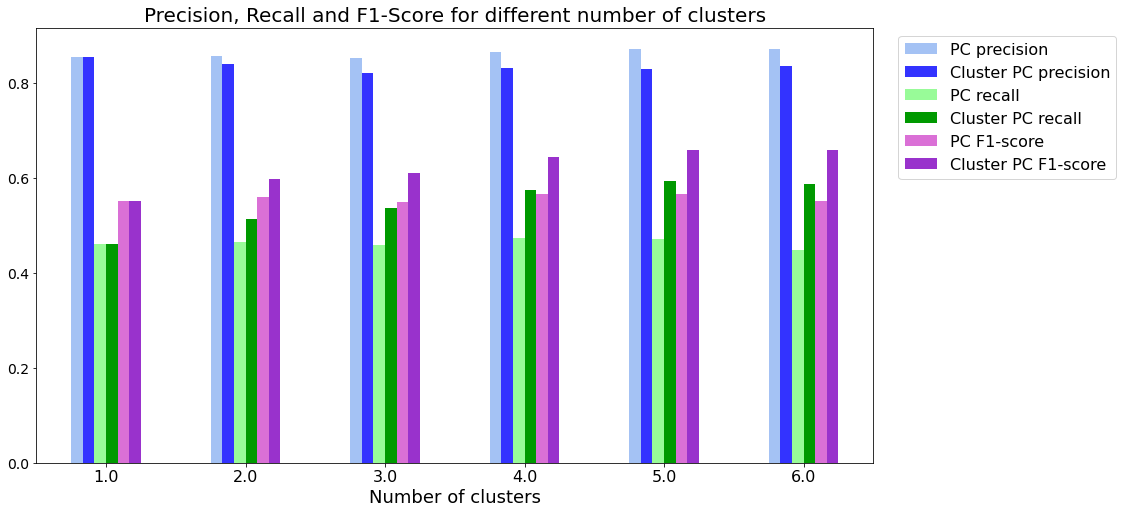

In [220]:
colors = ['#A4C2F4', '#3333FF', '#98FB98', '#009900', '#DA70D6', '#9932CC']
data_all.groupby('n_clusters').mean()[prec_recall_metrics].plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for different number of clusters', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names,  bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [221]:
data_all.groupby('n_clusters').mean()[dist_metrics]

,base_base_shd,cluster_cluster_shd
n_clusters,,
1.0,40.866667,40.866667
2.0,39.805556,37.205556
3.0,40.750000,35.877778
4.0,39.300000,33.405556
5.0,40.105556,32.383333
6.0,41.400000,32.594444


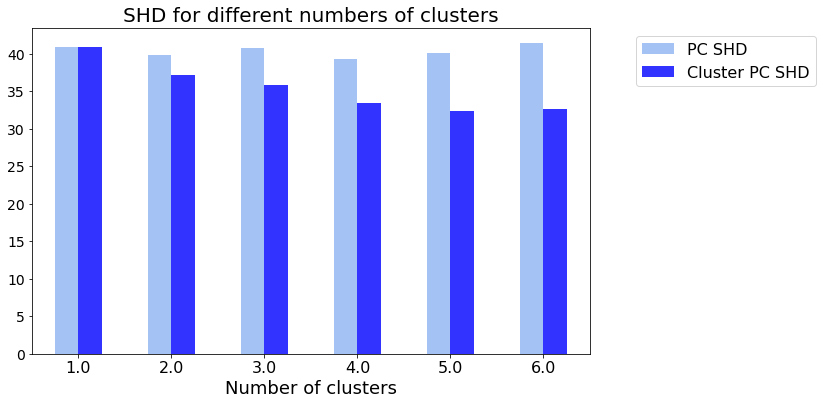

In [222]:
colors = ['#A4C2F4', '#3333FF']
data_all.groupby('n_clusters').mean()[dist_metrics].plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different numbers of clusters', fontsize = 20)
plt.xlabel('Number of clusters', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by alpha

In [223]:
data.groupby('alpha').mean()[prec_recall_metrics]

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
alpha,,,,,,
0.01,0.916112,0.902991,0.429894,0.524422,0.551538,0.640852
0.05,0.904338,0.885166,0.445340,0.537709,0.559914,0.642846
0.10,0.894794,0.866311,0.455244,0.556900,0.565258,0.650317
0.25,0.834739,0.792300,0.480221,0.586292,0.563331,0.636353
0.50,0.772943,0.714490,0.509988,0.604982,0.555869,0.603745


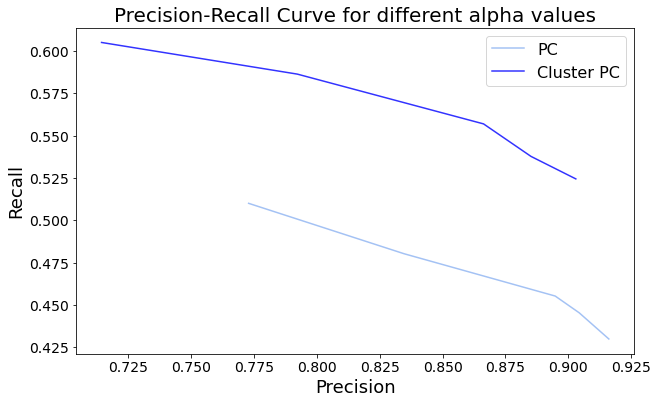

In [224]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.groupby('alpha').mean()['base_adj_precision'], data.groupby('alpha').mean()['base_adj_recall'], color = '#A4C2F4')
ax.plot(data.groupby('alpha').mean()['cluster_adj_precision'], data.groupby('alpha').mean()['cluster_adj_recall'], color = '#3333FF')
ax.set_title('Precision-Recall Curve for different alpha values', fontsize = 20)
ax.set_xlabel('Precision', fontsize=18)
ax.set_ylabel('Recall', fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.legend(['PC', 'Cluster PC'], fontsize=16)

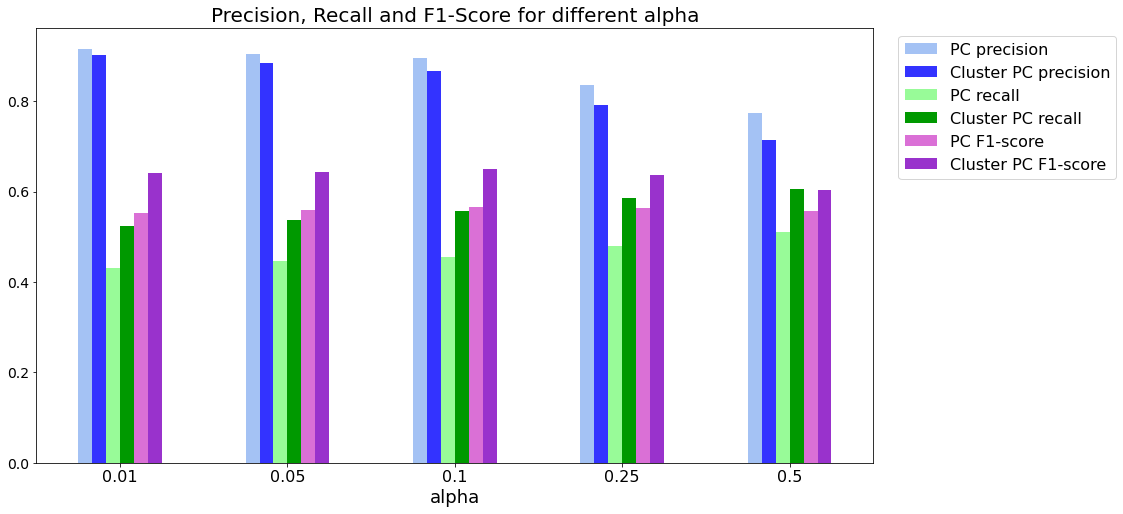

In [225]:
colors = ['#A4C2F4', '#3333FF', '#98FB98', '#009900', '#DA70D6', '#9932CC']
data.groupby('alpha').mean()[prec_recall_metrics].plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for different alpha', fontsize = 20)
plt.xlabel('alpha', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [226]:
data.groupby('alpha').mean()[dist_metrics]

,base_base_shd,cluster_cluster_shd
alpha,,
0.01,40.061111,33.483333
0.05,39.561111,33.772222
0.10,39.772222,33.088889
0.25,40.022222,33.855556
0.50,41.944444,37.266667


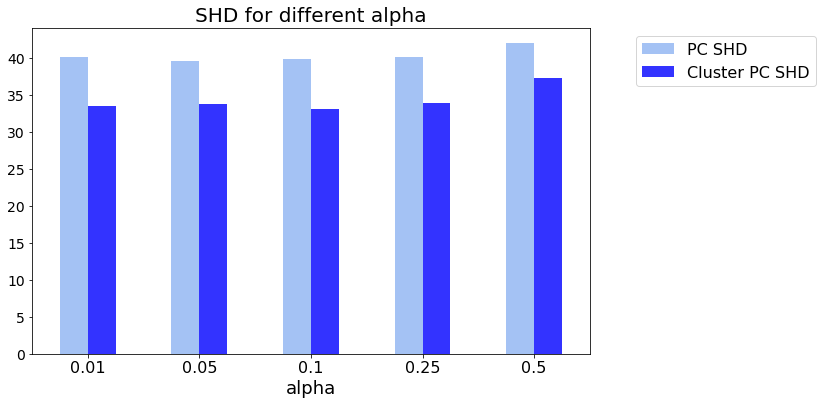

In [227]:
colors = ['#A4C2F4', '#3333FF']
data.groupby('alpha').mean()[dist_metrics].plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different alpha', fontsize = 20)
plt.xlabel('alpha', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by distribution type


In [228]:
data.groupby('distribution_type').mean()[prec_recall_metrics]

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
distribution_type,,,,,,
exp,0.857808,0.828024,0.464721,0.564380,0.557131,0.635359
gauss,0.869965,0.837394,0.465413,0.564434,0.562328,0.638352
gumbel,0.865983,0.831336,0.462278,0.557369,0.558088,0.630756


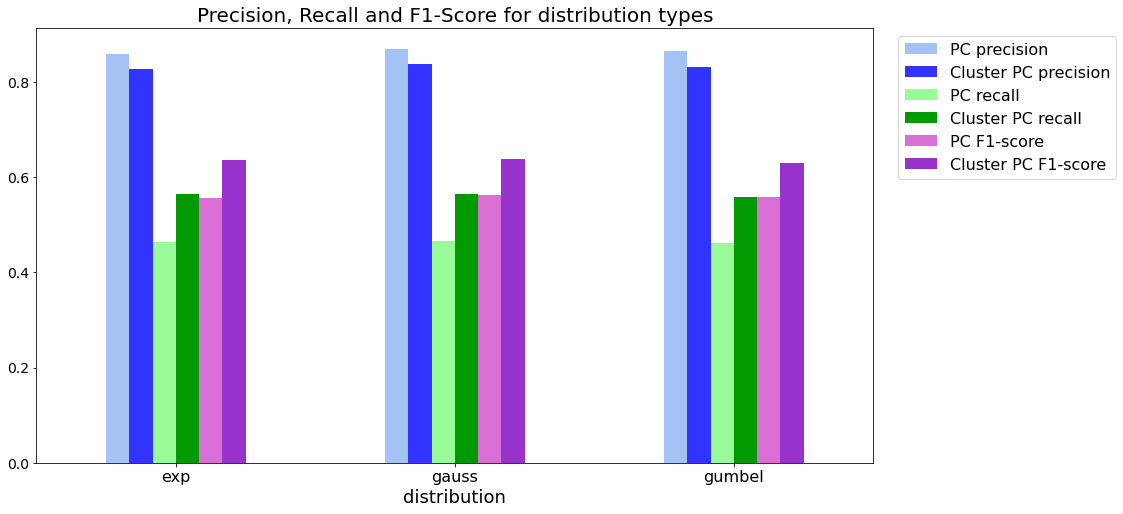

In [229]:
colors = ['#A4C2F4', '#3333FF', '#98FB98', '#009900', '#DA70D6', '#9932CC']
data.groupby('distribution_type').mean()[prec_recall_metrics].plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for distribution types', fontsize = 20)
plt.xlabel('distribution', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [230]:
data.groupby('distribution_type').mean()[dist_metrics]

,base_base_shd,cluster_cluster_shd
distribution_type,,
exp,40.310000,34.326667
gauss,40.123333,33.933333
gumbel,40.383333,34.620000


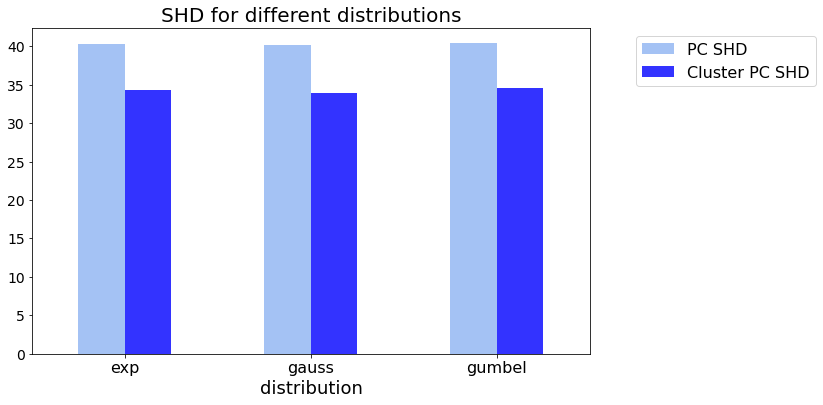

In [231]:
colors = ['#A4C2F4', '#3333FF']
data.groupby('distribution_type').mean()[dist_metrics].plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different distributions', fontsize = 20)
plt.xlabel('distribution', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by DAG method

In [232]:
data.groupby('dag_method').mean()[prec_recall_metrics]

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
dag_method,,,,,,
erdos_renyi,0.848732,0.808552,0.544638,0.635218,0.618296,0.675626
hierarchical,0.903317,0.891991,0.248063,0.367453,0.386609,0.515766
scale_free,0.841707,0.796212,0.599711,0.683512,0.672641,0.713075


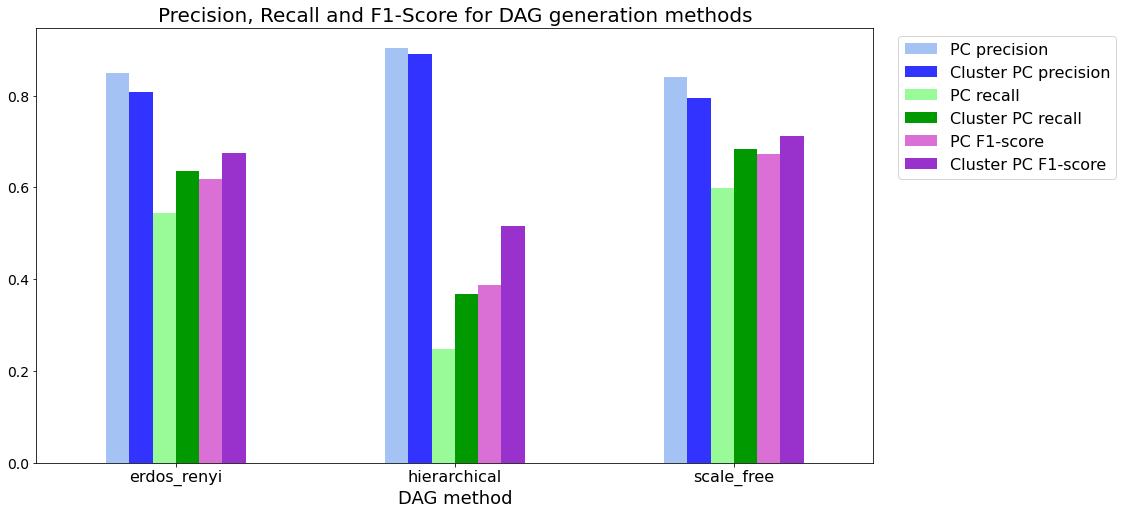

In [233]:
colors = ['#A4C2F4', '#3333FF', '#98FB98', '#009900', '#DA70D6', '#9932CC']
data.groupby('dag_method').mean()[prec_recall_metrics].plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score for DAG generation methods', fontsize = 20)
plt.xlabel('DAG method', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [234]:
data.groupby('dag_method').mean()[dist_metrics]

,base_base_shd,cluster_cluster_shd
dag_method,,
erdos_renyi,32.130000,27.410000
hierarchical,65.573333,56.003333
scale_free,23.113333,19.466667


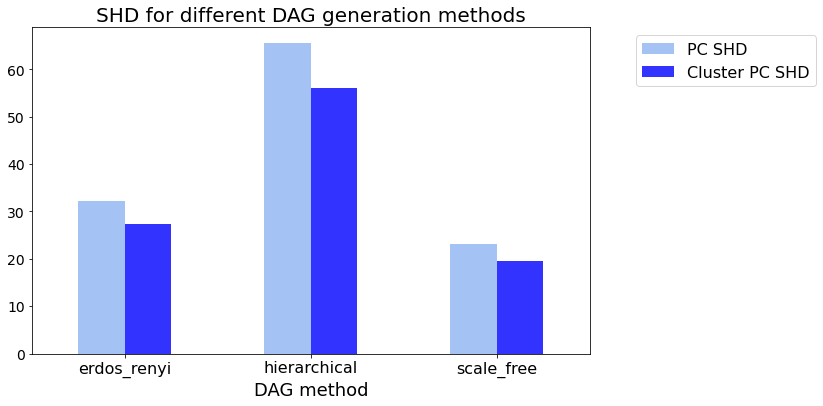

In [235]:
colors = ['#A4C2F4', '#3333FF']
data.groupby('dag_method').mean()[dist_metrics].plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different DAG generation methods', fontsize = 20)
plt.xlabel('DAG method', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')

### Grouping by #edges

In [236]:
data.groupby('n_edges').mean()[prec_recall_metrics]

,base_adj_precision,cluster_adj_precision,base_adj_recall,cluster_adj_recall,base_adj_f1_score,cluster_adj_f1_score
n_edges,,,,,,
15.0,0.843480,0.801699,0.679761,0.736713,0.684001,0.710425
30.0,0.885125,0.845446,0.521864,0.615081,0.627920,0.685672
50.0,0.872614,0.837464,0.384349,0.499568,0.518946,0.610957
80.0,0.857122,0.844398,0.270576,0.396882,0.405862,0.532237


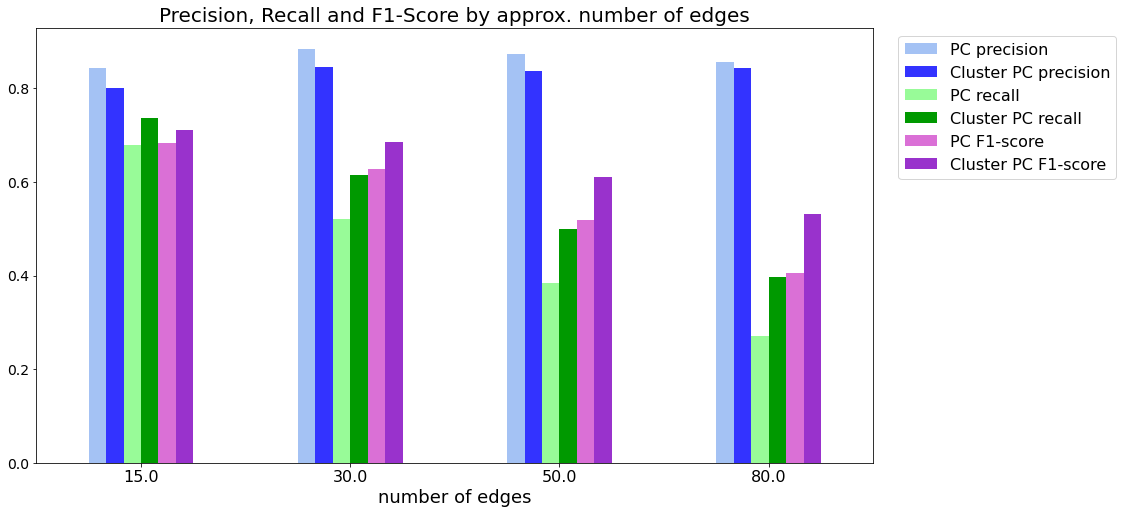

In [237]:
colors = ['#A4C2F4', '#3333FF', '#98FB98', '#009900', '#DA70D6', '#9932CC']
data.groupby('n_edges').mean()[prec_recall_metrics].plot(kind='bar', figsize=(15, 8), color = colors)
plt.title('Precision, Recall and F1-Score by approx. number of edges', fontsize = 20)
plt.xlabel('number of edges', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC precision', 'Cluster PC precision', 'PC recall', 'Cluster PC recall', 'PC F1-score', 'Cluster PC F1-score']
plt.legend(label_names, bbox_to_anchor = (1.3, 1),  fontsize=16, loc='upper right')

In [238]:
data.groupby('n_edges').mean()[dist_metrics]

,base_base_shd,cluster_cluster_shd
n_edges,,
15.0,26.782222,23.475556
30.0,32.364444,27.582222
50.0,43.017778,36.262222
80.0,58.924444,49.853333


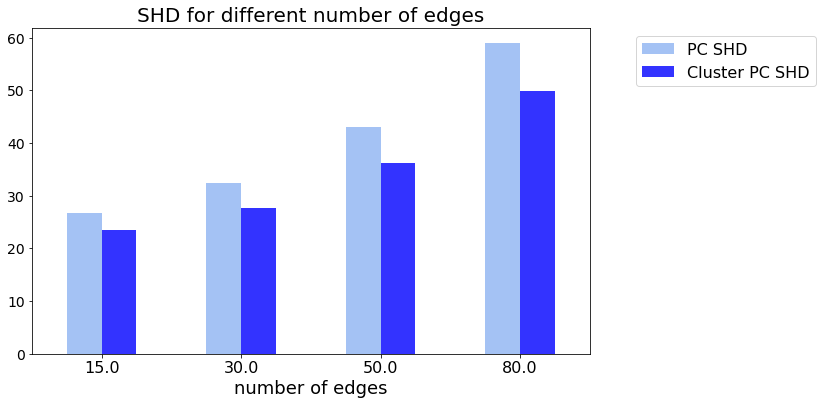

In [239]:
colors = ['#A4C2F4', '#3333FF']
data.groupby('n_edges').mean()[dist_metrics].plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('SHD for different number of edges', fontsize = 20)
plt.xlabel('number of edges', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC SHD', 'Cluster PC SHD']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')